In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
#from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE

import warnings
warnings.filterwarnings("ignore")

E:\anaconda\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\anaconda\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
E:\anaconda\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
E:\anaconda\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in

In [2]:
data = pd.read_csv('application_data.csv')
df=data.copy()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
list(data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Object type column treatment

In [5]:
print("Object type values:",np.count_nonzero(df.select_dtypes('object').columns))
print("___________________________________________________________________________________________")
print(df.select_dtypes('object').columns)
print("___________________________________________________________________________________________")

Object type values: 16
___________________________________________________________________________________________
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
___________________________________________________________________________________________


In [76]:
data.select_dtypes('object').describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [6]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(t):
    total = t.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = t.isnull().sum().sort_values(ascending = False)/len(t)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(data.select_dtypes('object')) # use rao data to see the missing value

,Total,Percentage
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


Columns: contain 50% missing value we want to drop, EMERGENCYSTATE_MODE is also very close to 50%, discuss it first

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


<AxesSubplot:xlabel='EMERGENCYSTATE_MODE', ylabel='count'>

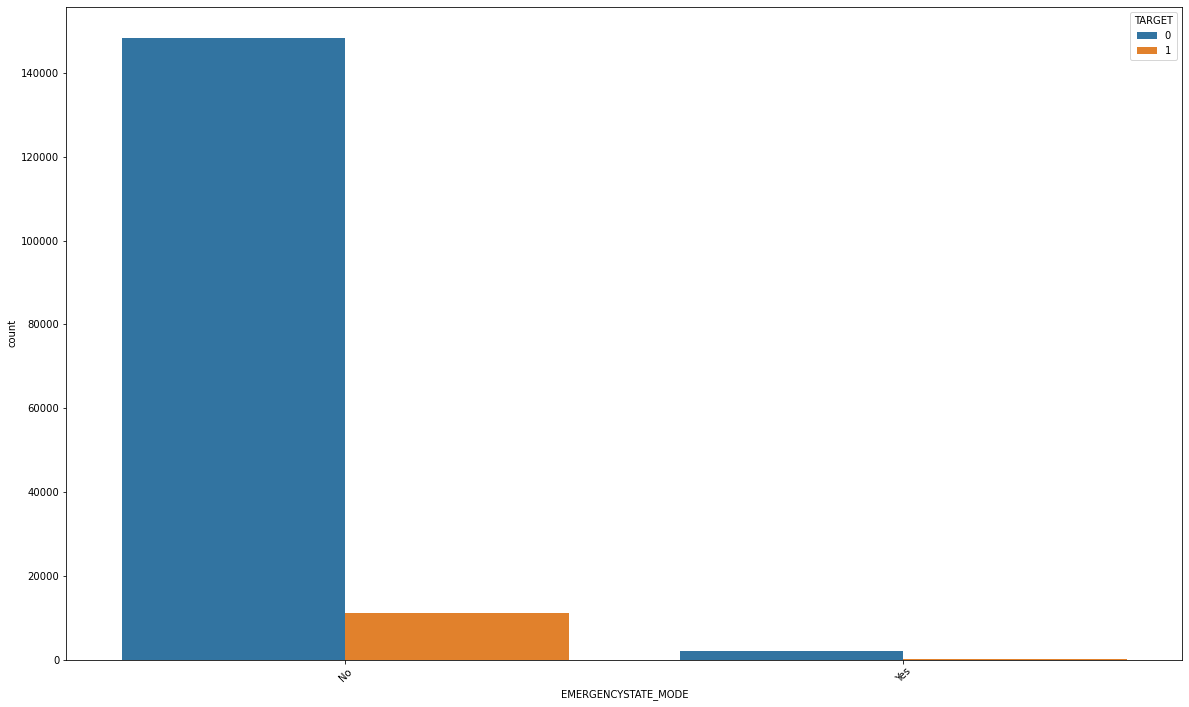

In [7]:
print(df['EMERGENCYSTATE_MODE'].value_counts())
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = '45')
sns.countplot(x='EMERGENCYSTATE_MODE', hue= 'TARGET', data = df) 

In [8]:
df['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [9]:
df[df['TARGET'] == 1]['EMERGENCYSTATE_MODE'].value_counts()

No     11104
Yes      223
Name: EMERGENCYSTATE_MODE, dtype: int64

<AxesSubplot:>

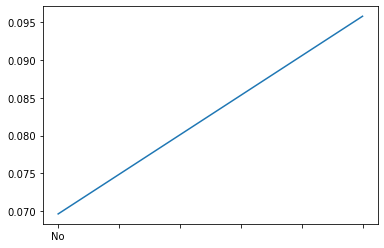

In [12]:
All = df['EMERGENCYSTATE_MODE'].value_counts()
Default = df[df['TARGET'] == 1]['EMERGENCYSTATE_MODE'].value_counts()
RATE = Default/All 
RATE.plot()

the default rate difference between yes and no type is not big, and majority of this type is no, which is over 70 times as yes, we just drop it.

In [13]:
unwanted_obj = ['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']

treatment on occupation_type

In [14]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Occupation situation

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

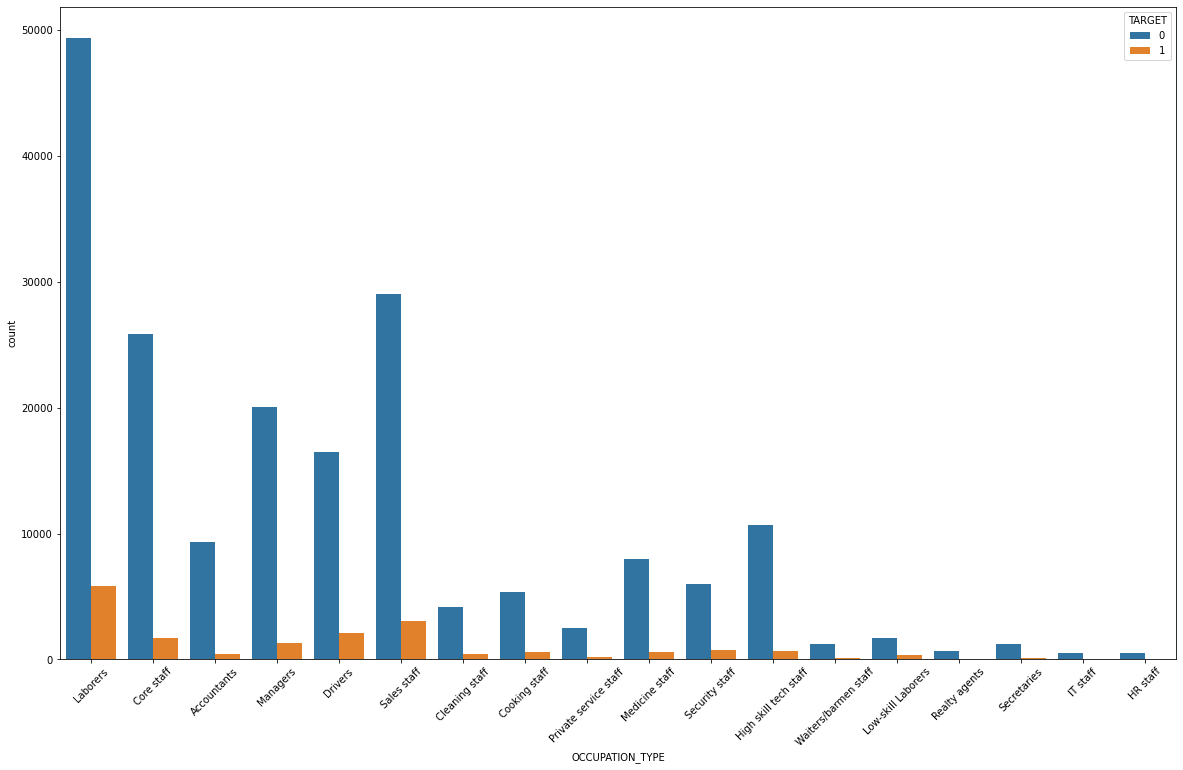

In [15]:
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = '45')
sns.countplot(x='OCCUPATION_TYPE', hue= 'TARGET', data = df)

Fill in NA in occupation columns with a new category 'no value', since there are too many occupations, we cannot use anyone to fill in, if we use mode, these data will be labeled as labourers, which have a high default rate. 

In [16]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('No Value')

In [17]:
df['OCCUPATION_TYPE'].value_counts()

No Value                 96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

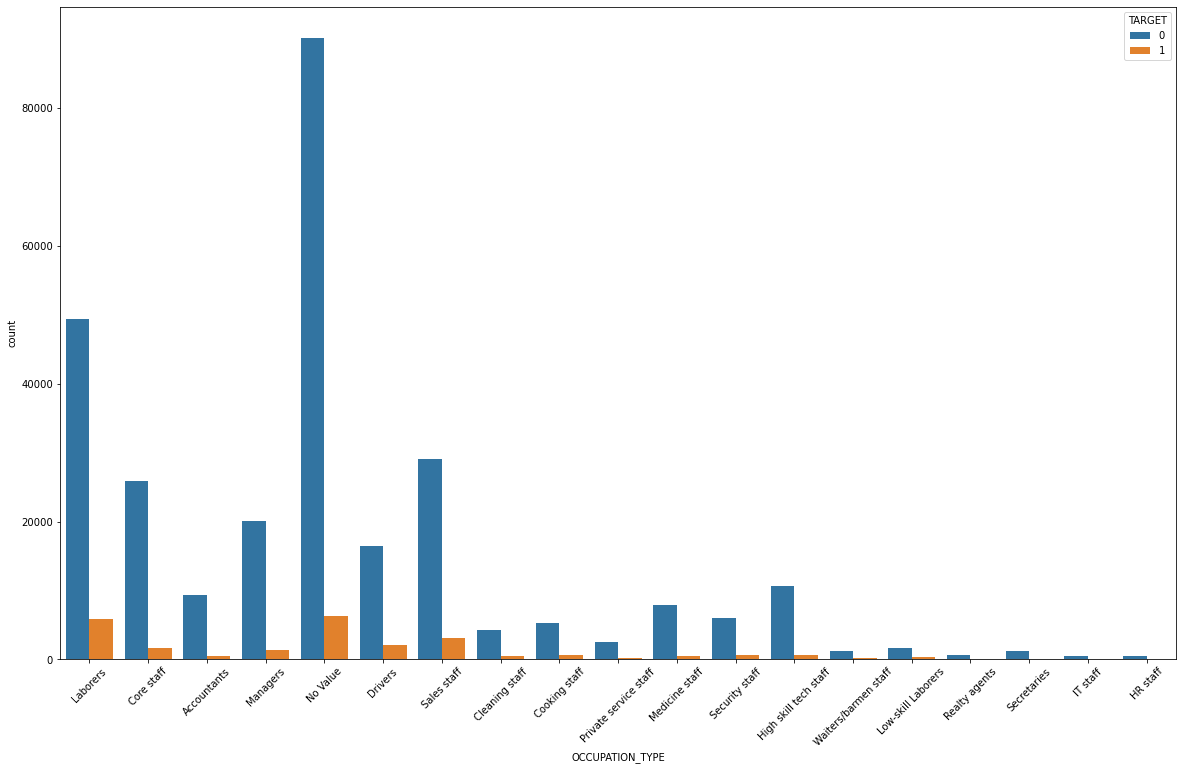

In [18]:
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = '45')
sns.countplot(x='OCCUPATION_TYPE', hue= 'TARGET', data = df)

NAME_TYPE_SUITE treatment

In [19]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

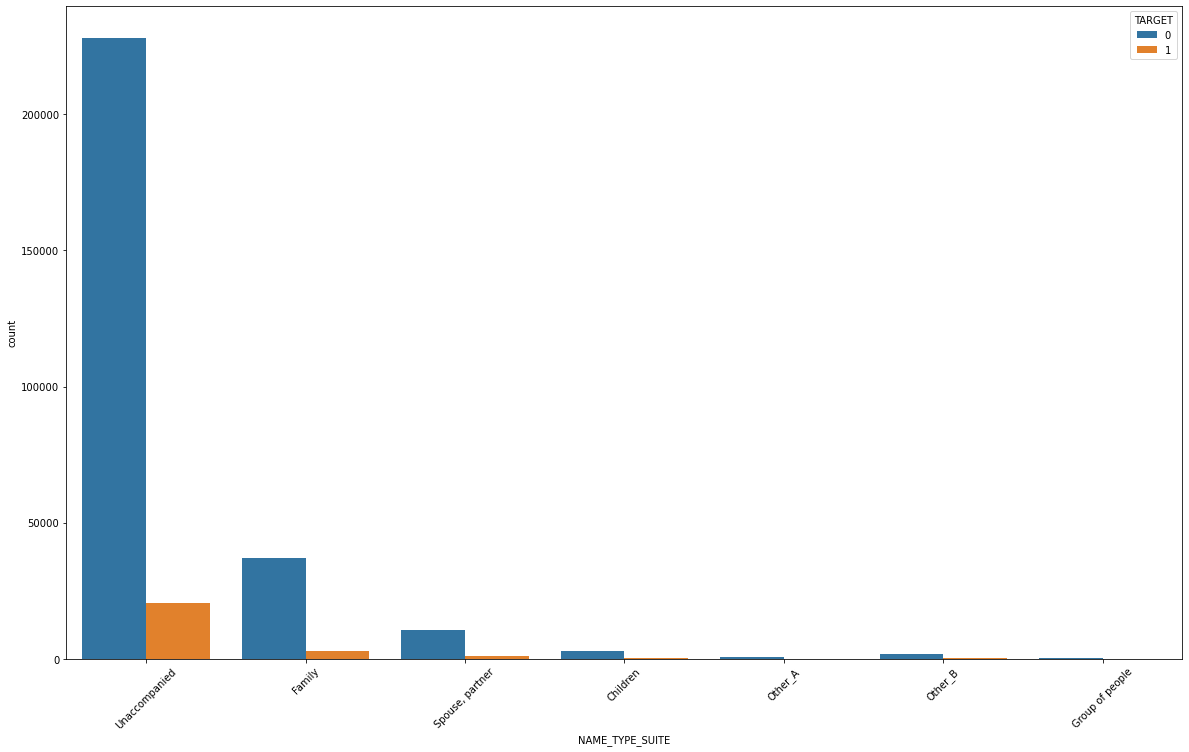

In [20]:
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_TYPE_SUITE', hue= 'TARGET', data = df)

Since the missing value of this columns is quite low, just 0.420148%, so we decide to use mode to fill in the missing value, which will not change the feature distribution a lot. 

In [21]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode())

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

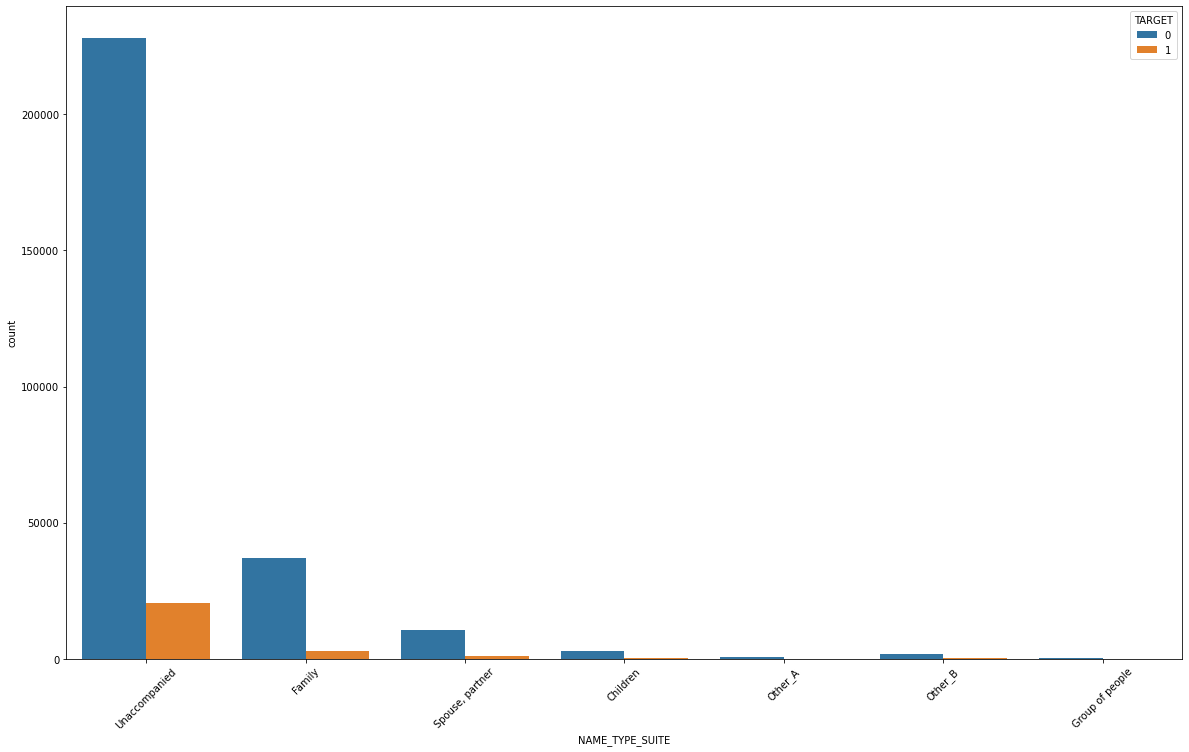

In [22]:
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_TYPE_SUITE', hue= 'TARGET', data = df)

- 'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE' are dropped because na value and own character.
- use a new value to fill in NA value of 'ORGANIZATION_TYPE'
- use mode to fill in VA value of 'NAME_HOUSING_TYPE'

In [44]:
unwanted_obj = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

### Treatment on int type

In [25]:
print("Int type values:",np.count_nonzero(df.select_dtypes('int').columns))
print("___________________________________________________________________________________________")
print(df.select_dtypes('int').columns)
print("___________________________________________________________________________________________")

Int type values: 41
___________________________________________________________________________________________
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLA

In [26]:
missing(df.select_dtypes('int')) 

,Total,Percentage


- SK_ID is the customers identity, will not influence the default behavior, so we just drop it
- Target is the value we want to predict
- There are no missing values for int type features
- So we just think about how to do feature engineer part
- Some features present a same topic

In [30]:
list_contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
list_region =  ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']
list_city = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
list_docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
list_rate = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
list_other = ['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']

In [31]:
print(len(list_contact), len(list_region), len(list_city), len(list_docs), len(list_rate), len(list_other))

6 3 3 20 2 6


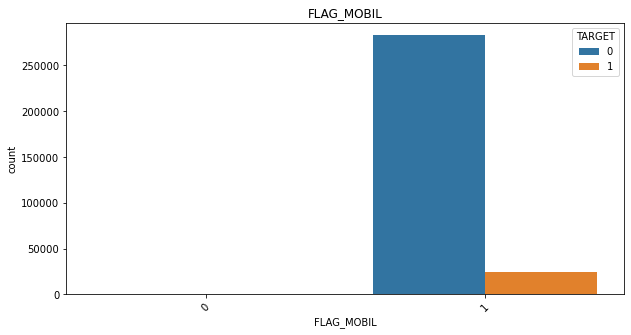

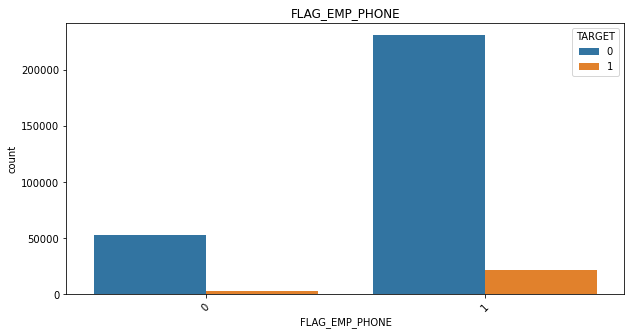

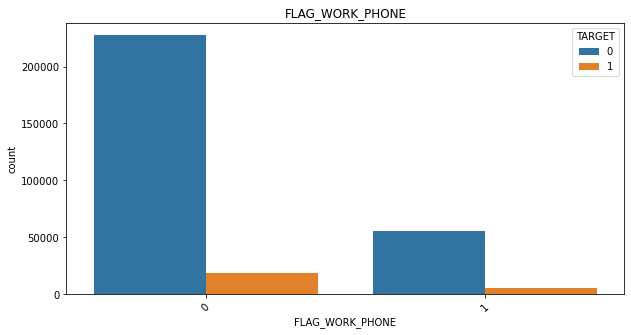

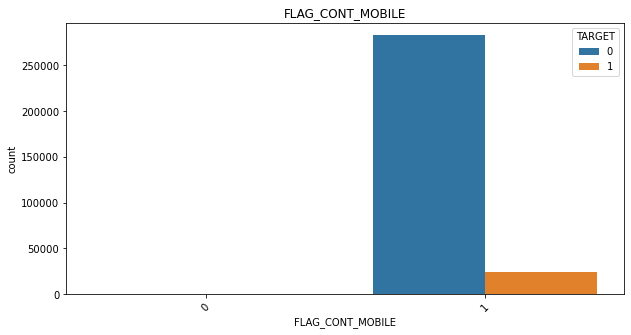

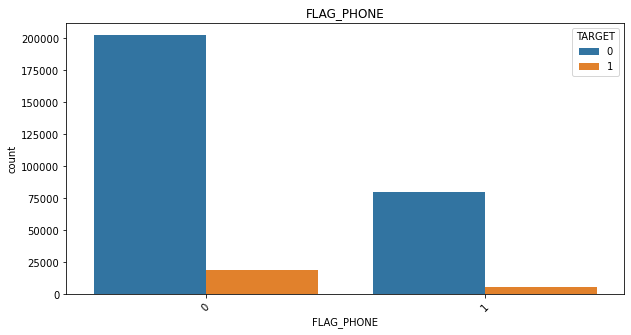

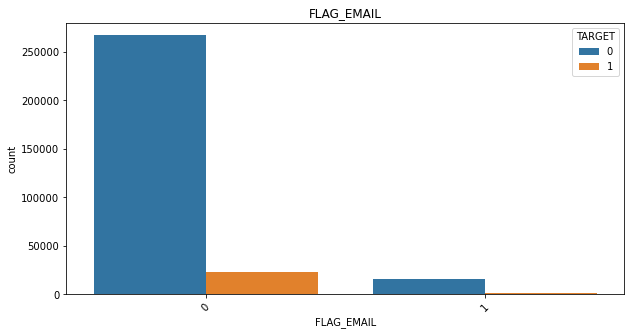

In [32]:
for i in list_contact:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = '45')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = df)

<AxesSubplot:>

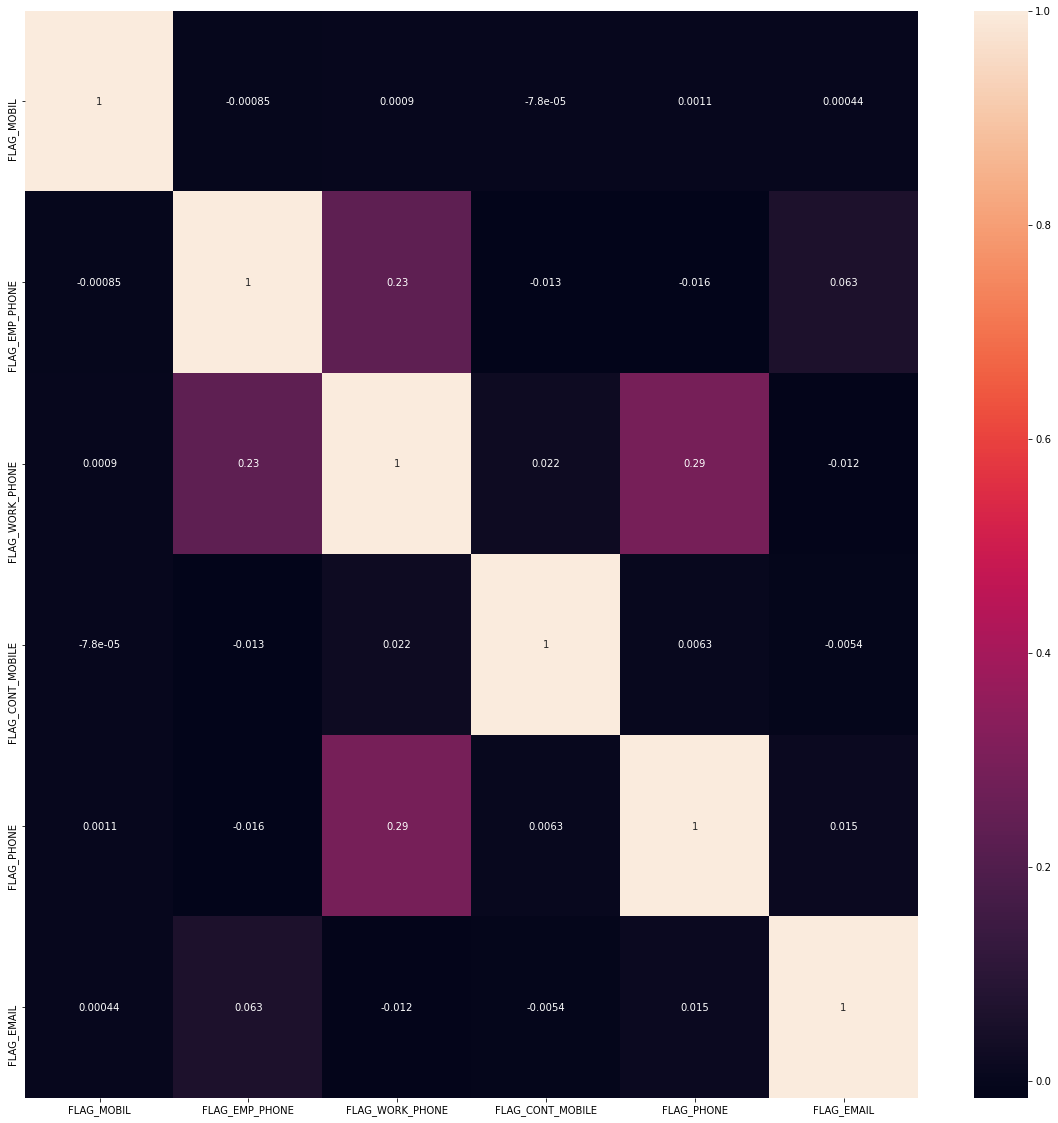

In [33]:
corr = df[list_contact].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

as for the list_contact, the correlation between features is not high, so we keep all the features in further learning

### List_region

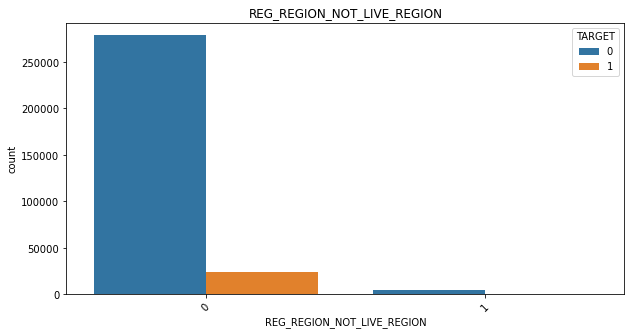

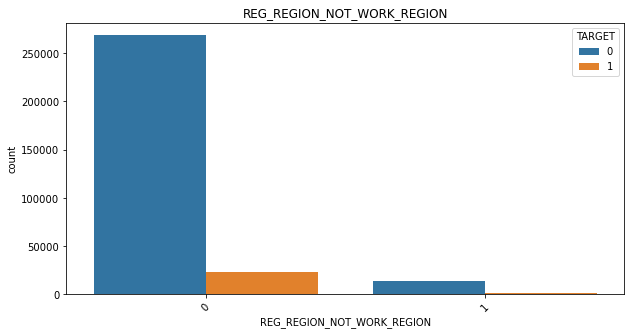

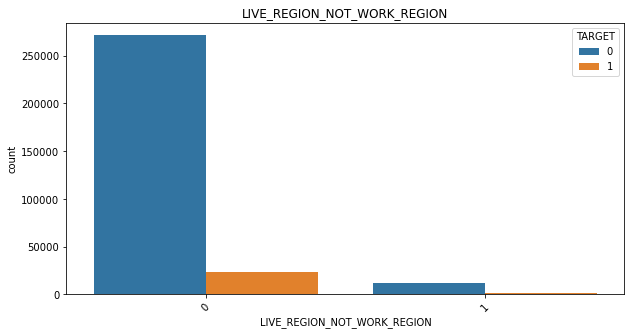

In [34]:
for i in list_region:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = '45')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = df)

<AxesSubplot:>

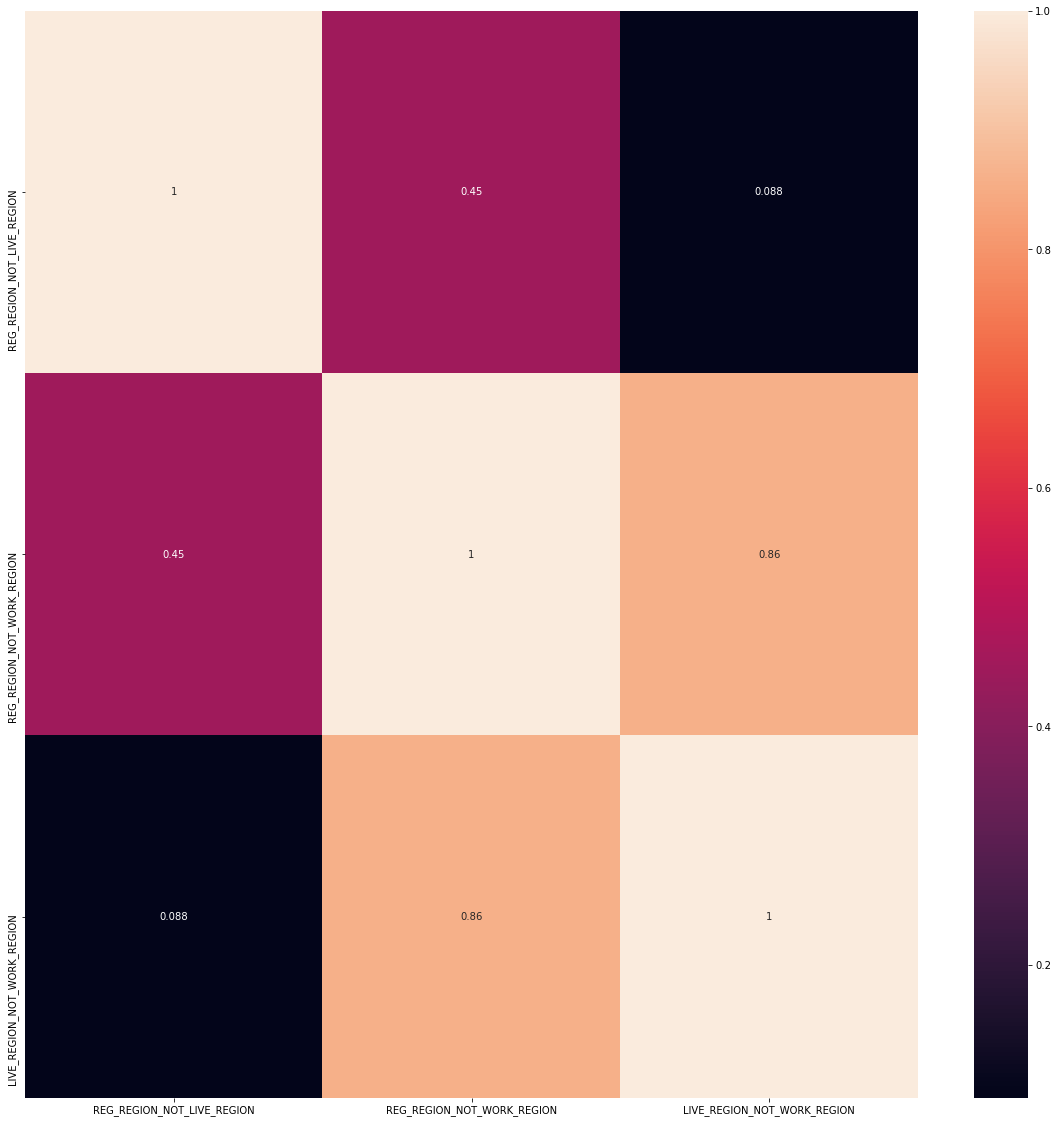

In [35]:
corr = df[list_region].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

the correlation between 'REG_REGION_NOT_WORK_REGION' and 'LIVE_REGION_NOT_WORK_REGION' is quite high. 
and according to the barchart, the distribution is quite similar, so we just keep one feature in df and the REG NOT LIVE have strong correlation with REG NOT REGION, so REG NOT WORK have more similar infomation, for reduce info loss, we choose drop REG NOT WORK

### list_city

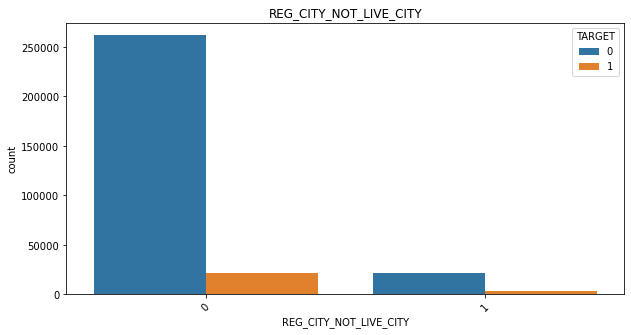

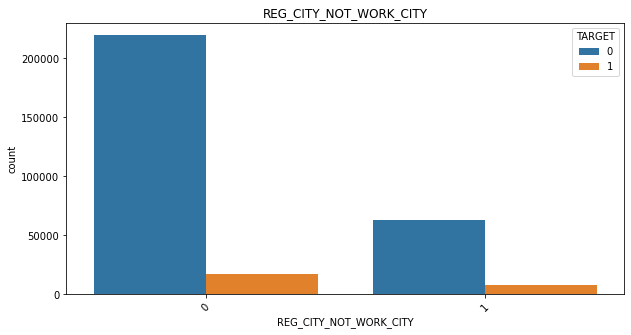

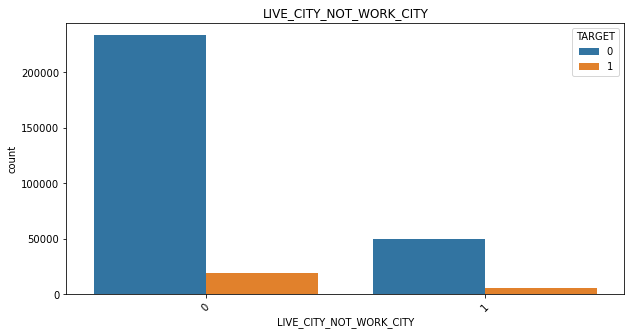

In [37]:
for i in list_city:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = '45')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = df)

<AxesSubplot:>

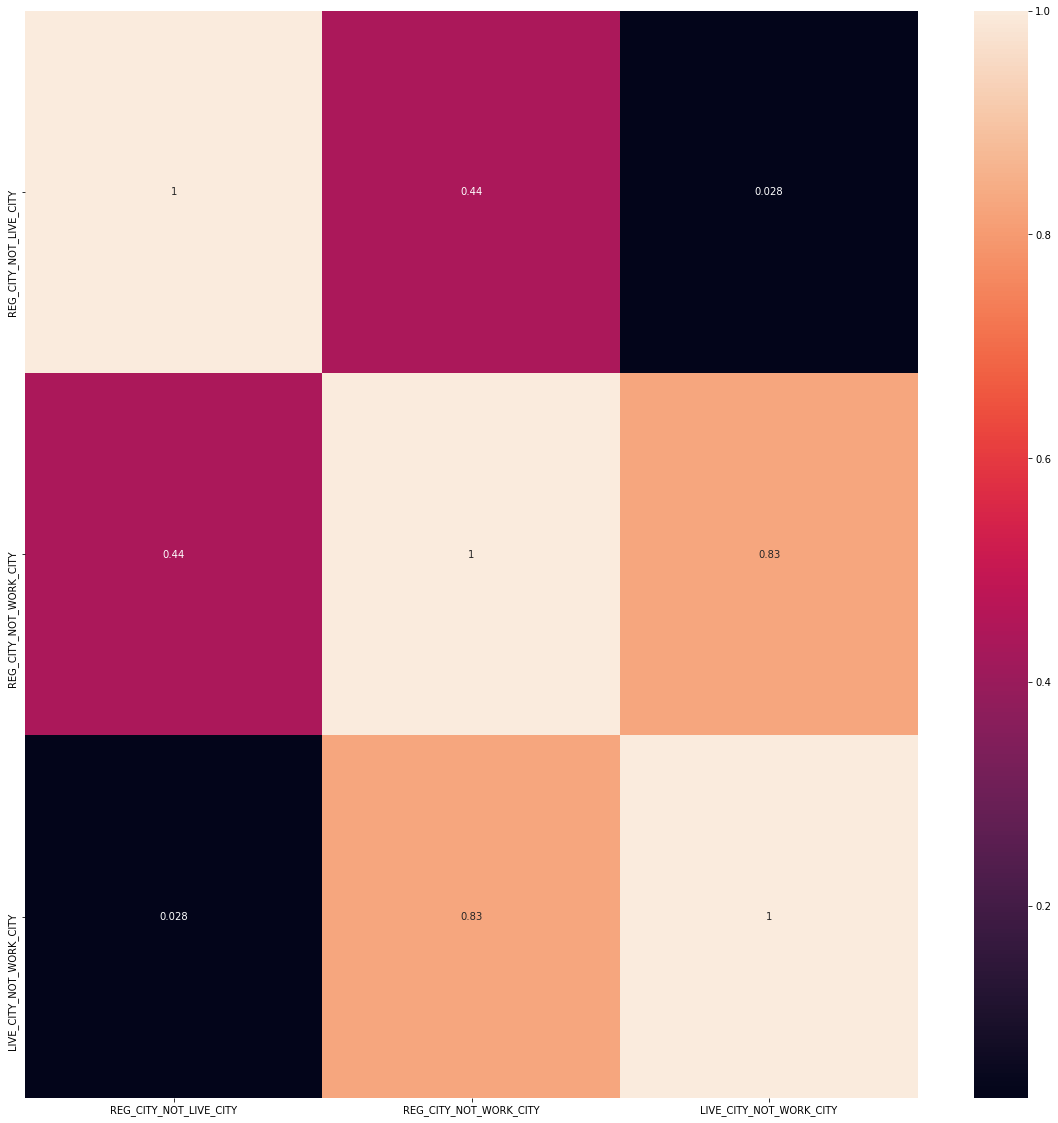

In [38]:
corr = df[list_city].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

the result is quite same as region type so we also drop REG_CITY_NOT_WORK_CITY

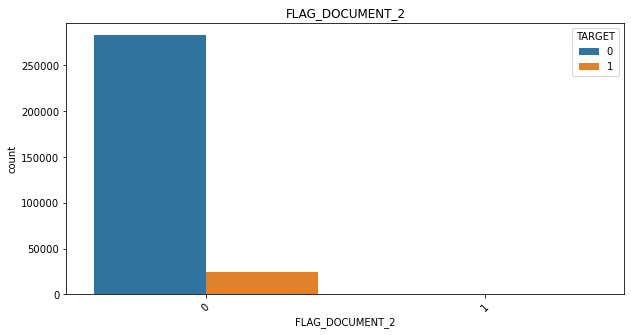

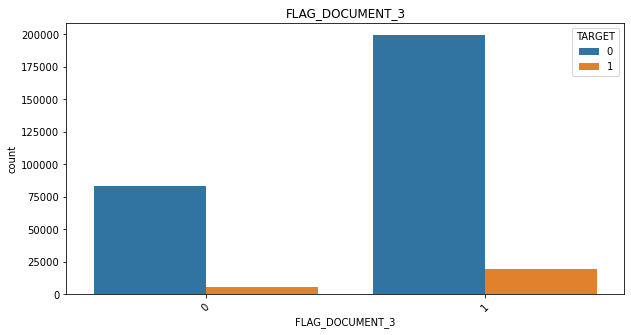

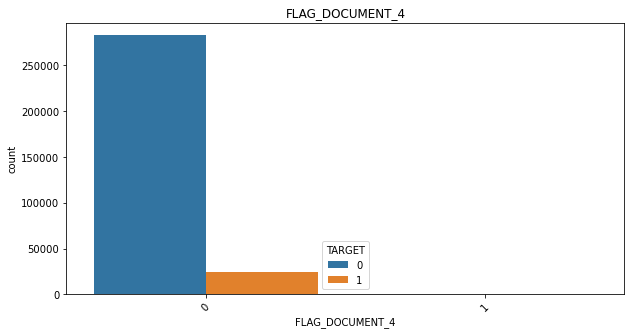

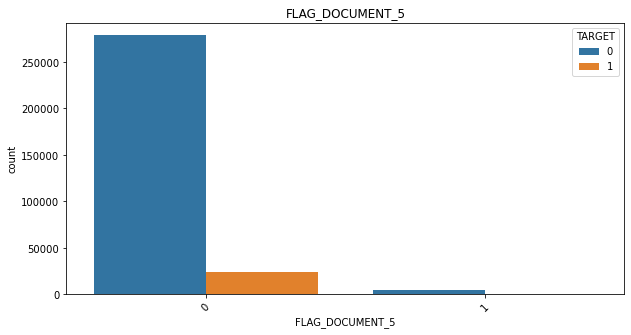

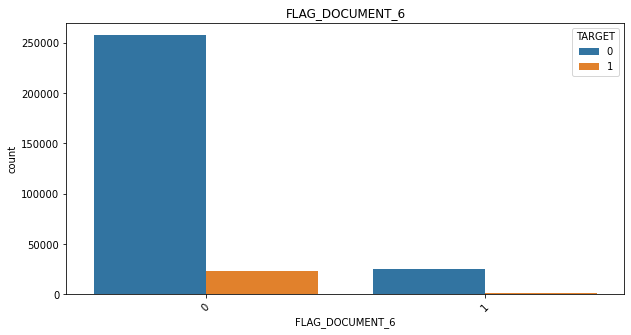

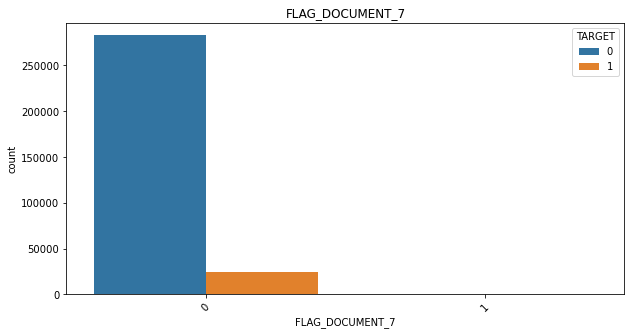

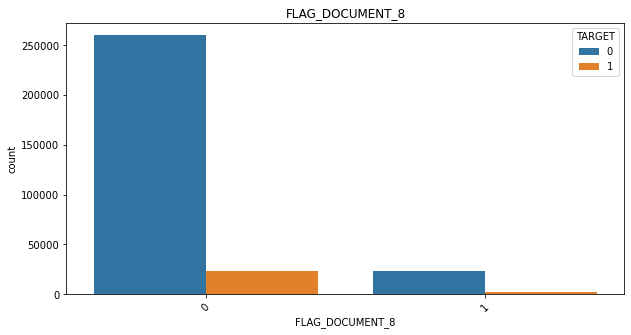

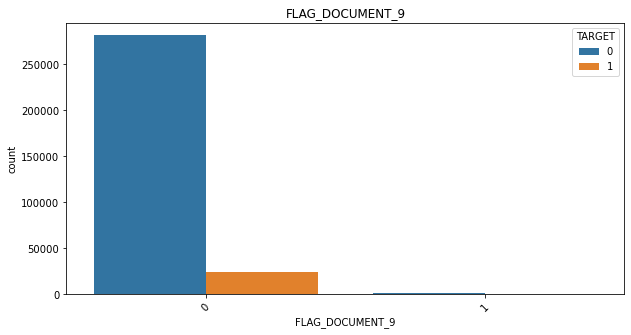

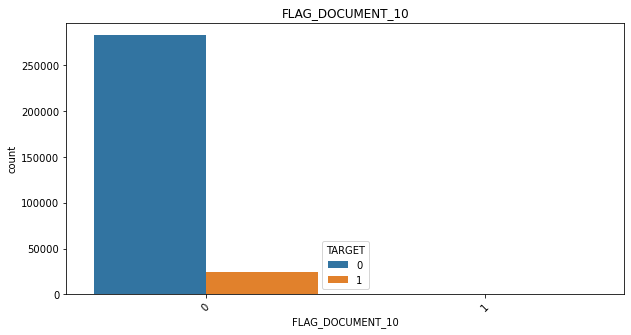

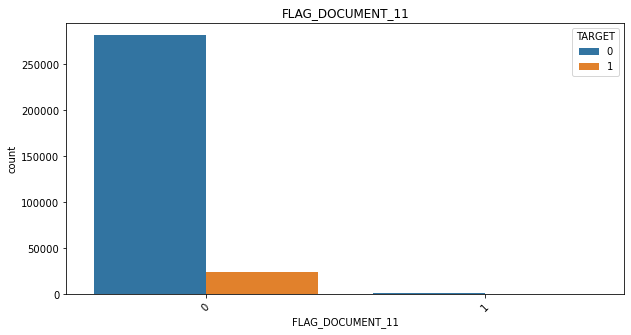

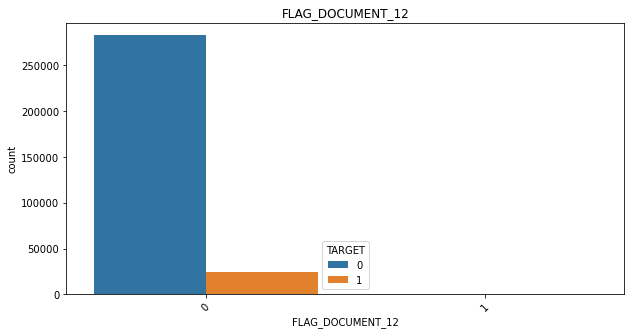

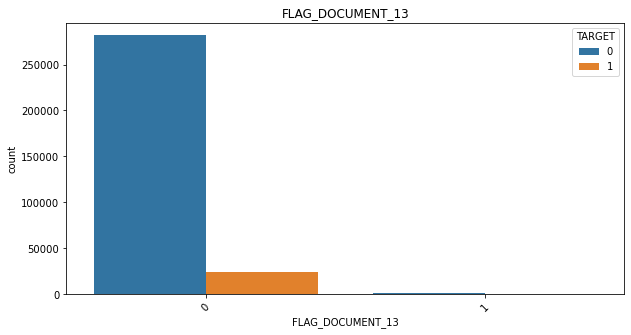

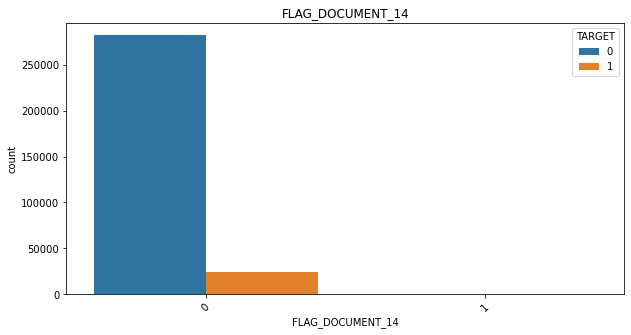

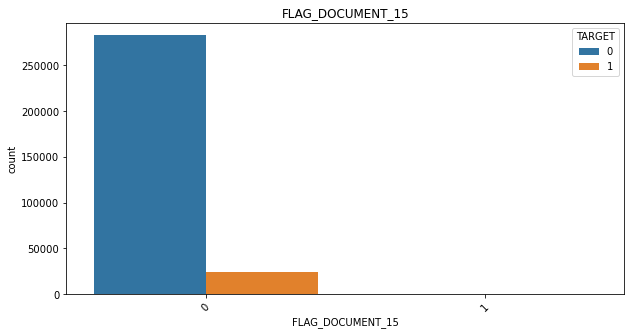

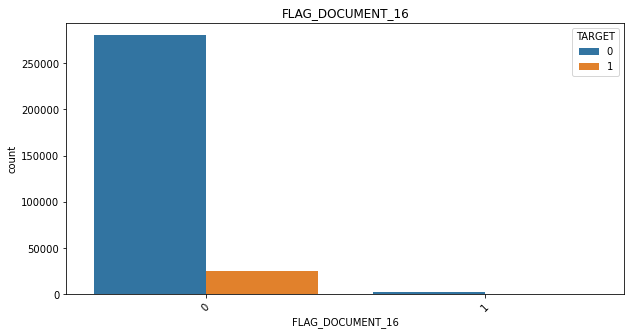

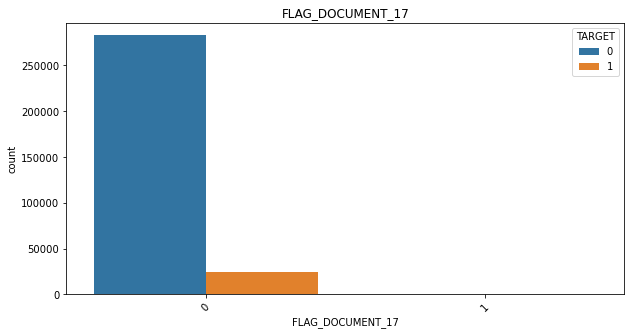

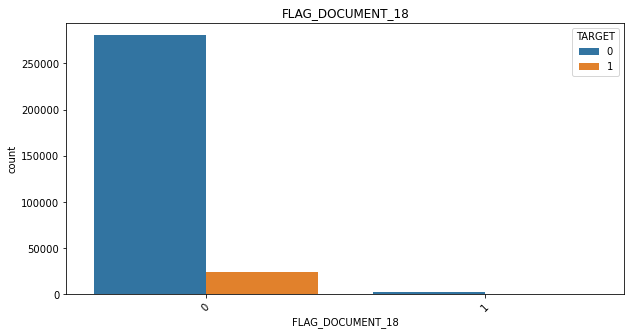

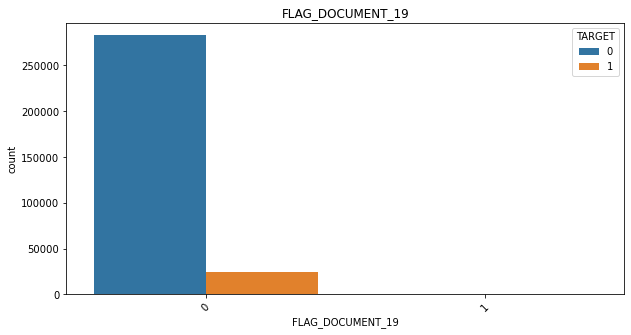

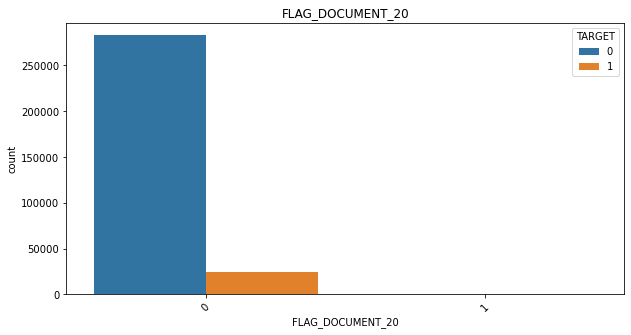

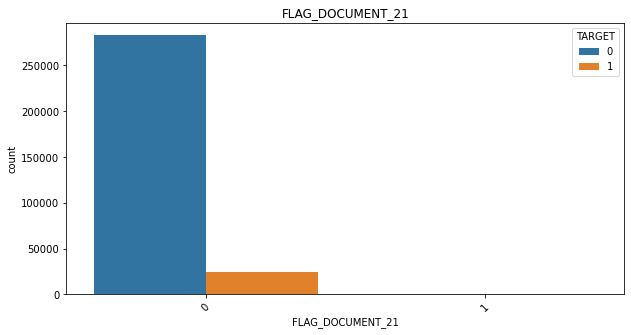

In [40]:
for i in list_docs:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = '45')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = df)

<AxesSubplot:>

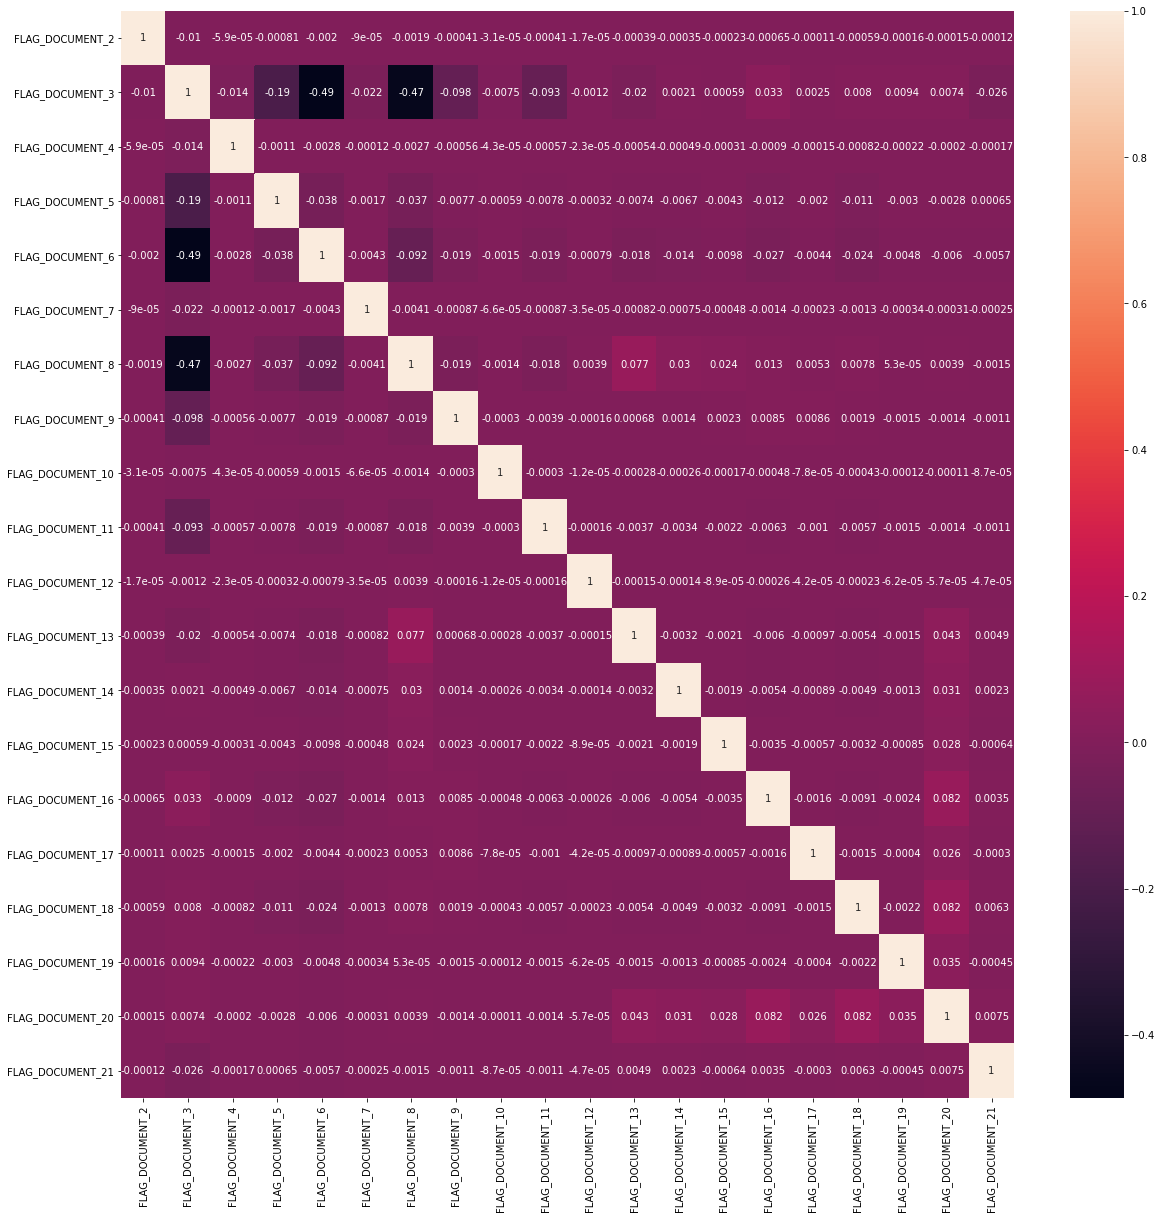

In [41]:
corr = df[list_docs].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

all the documents don't have strong correlation, and we also cannot explain what's the meaning of each document, so we just calculate how many documents every customer submit to present the completeness of document submision

In [45]:
df['docs'] = df['FLAG_DOCUMENT_2']+df['FLAG_DOCUMENT_3']+df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] +df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21']

### rate on city and region

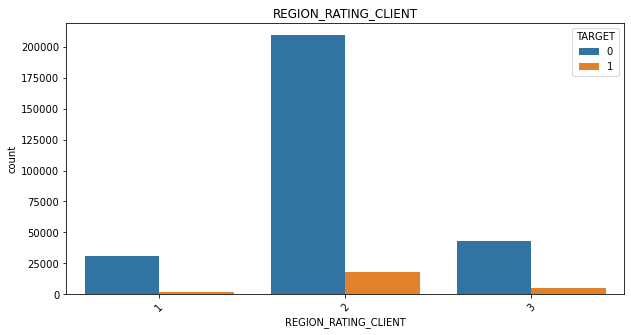

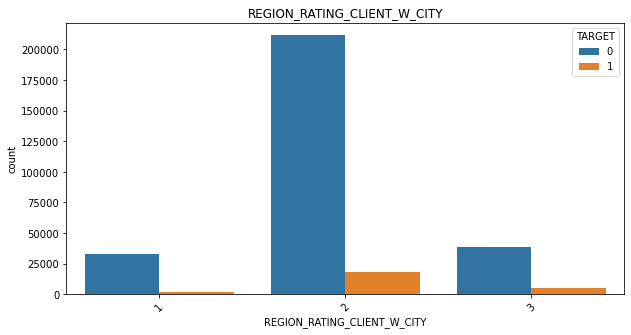

In [42]:
for i in list_rate:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = '45')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = df)

<AxesSubplot:>

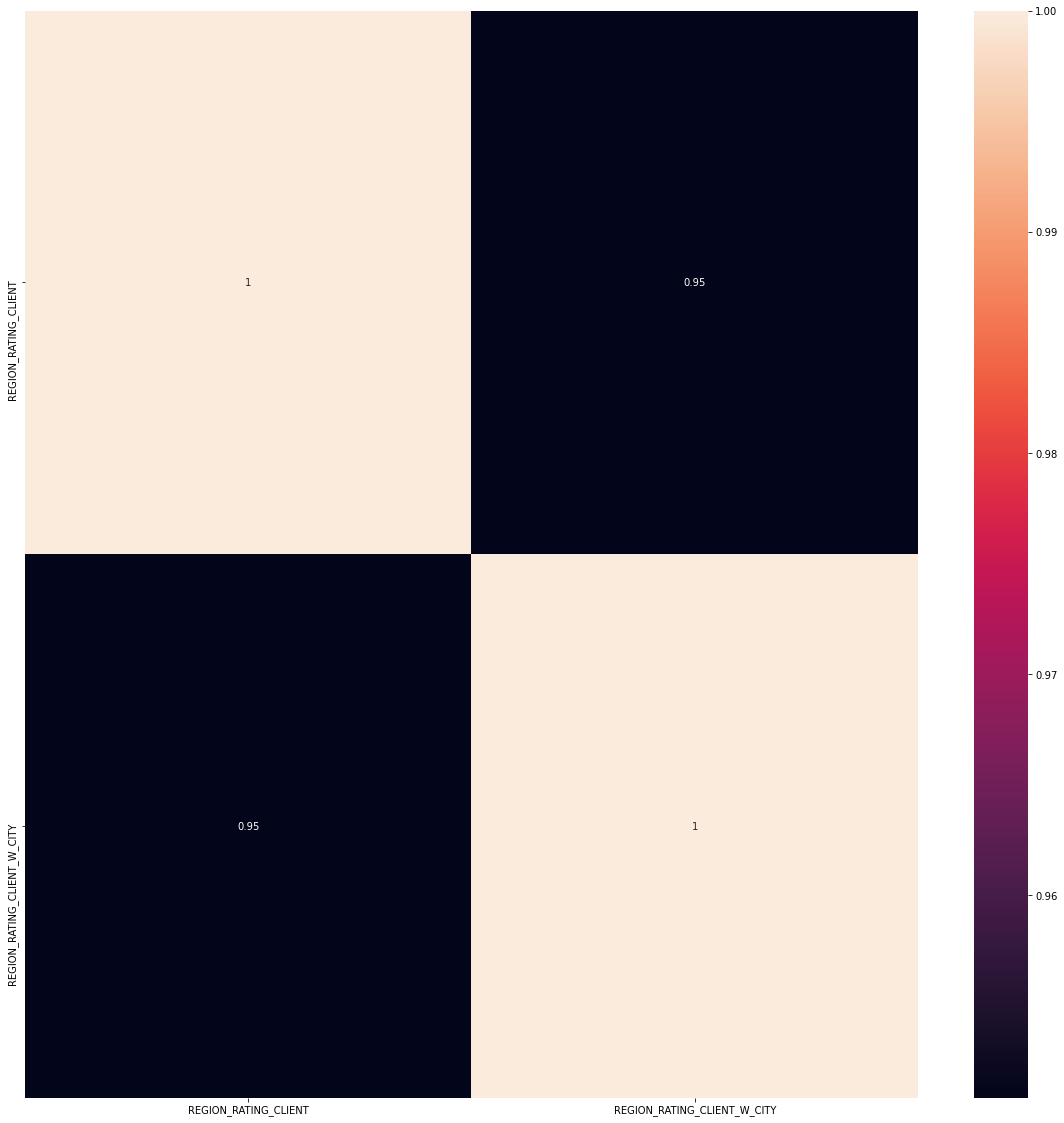

In [43]:
corr = df[list_rate].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

- the correlation is quite high, so we just save one feature

### Others

#### Hour of application

In [50]:
df['HOUR_APPR_PROCESS_START'].value_counts()

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

it's hard to see the default rate of each time is equal or not

<AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}, xlabel='HOUR_APPR_PROCESS_START', ylabel='count'>

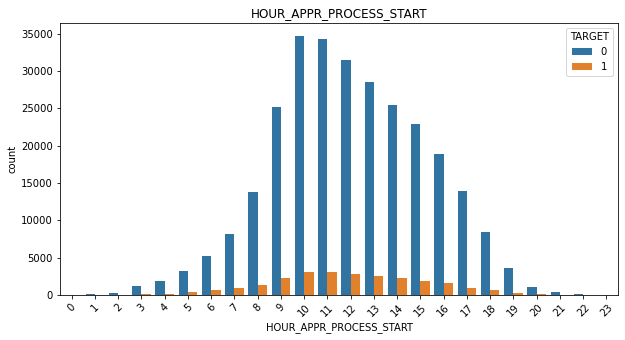

In [51]:
plt.subplots(figsize=(10, 5))
plt.xticks(rotation = '45')
plt.title('HOUR_APPR_PROCESS_START')
sns.countplot(x='HOUR_APPR_PROCESS_START', hue= 'TARGET', data = df)

Plot the default rate of each time

In [104]:
unwanted_int = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'SK_ID_CURR','REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT_W_CITY']

# Combine df

In [102]:
df_obj = df.select_dtypes('object')
df_obj = df_obj.drop(unwanted_obj, axis = 1)
df_obj.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,19,No Value,96391


In [105]:
df_int = df.select_dtypes('int')
df_int = df_int.drop(unwanted_int, axis = 1)
df_int.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0


In [112]:
df_float = pd.read_csv('float_after_selection.csv')

In [114]:
df_float.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,307511.0,153755.000000,88770.923652,0.000000e+00,76877.500000,153755.000000,230632.500000,3.075100e+05
Unnamed: 0,307511.0,153755.000000,88770.923652,0.000000e+00,76877.500000,153755.000000,230632.500000,3.075100e+05
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27107.867258,14493.895950,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
EXT_SOURCE_2,307511.0,0.513902,0.191148,8.173617e-08,0.390782,0.565467,0.663422,8.549997e-01
EXT_SOURCE_3,307511.0,0.557531,0.198114,5.272652e-04,0.417100,0.604113,0.746300,8.960095e-01
OBS_30_CNT_SOCIAL_CIRCLE,307511.0,1.417523,2.398395,0.000000e+00,0.000000,0.000000,2.000000,3.480000e+02


In [119]:
# list_credit = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [120]:
df_new = pd.concat([df_obj, df_int, df_float], axis = 1)

In [126]:
df_new.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'TARGET',
       'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'docs', 'Unnamed: 0.1', 'Unnamed: 0',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY

In [127]:
drop = ['Unnamed: 0.1', 'Unnamed: 0']

In [208]:
df = df_new.drop(drop, axis = 1)

In [209]:
len(df.columns)

48

# change all the type into numerical

In [210]:
le = LabelEncoder()
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = le.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_TYPE_SUITE'] = le.fit_transform(df['NAME_TYPE_SUITE'].astype(str))
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = le.fit_transform(df['OCCUPATION_TYPE'].astype(str))
df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  int32  
 1   CODE_GENDER                  307511 non-null  int32  
 2   FLAG_OWN_CAR                 307511 non-null  int32  
 3   FLAG_OWN_REALTY              307511 non-null  int32  
 4   NAME_TYPE_SUITE              307511 non-null  int32  
 5   NAME_INCOME_TYPE             307511 non-null  int32  
 6   NAME_EDUCATION_TYPE          307511 non-null  int32  
 7   NAME_FAMILY_STATUS           307511 non-null  int32  
 8   NAME_HOUSING_TYPE            307511 non-null  int32  
 9   OCCUPATION_TYPE              307511 non-null  int32  
 10  WEEKDAY_APPR_PROCESS_START   307511 non-null  int32  
 11  ORGANIZATION_TYPE            307511 non-null  int32  
 12  TARGET                       307511 non-null  int64  
 13 

# Build classification models

In [212]:
X = df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math

In [215]:
def model_Evaluate(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)
    scaler = RobustScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # accuracy of model on training data
    acc_train = model.score(X_train_scaled, y_train)
    # accuracy of model on test data
    acc_test = model.score(X_test_scaled, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
    
    # y_score
    try:
        y_score = model.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
    except:
        pass
    
    try:
        clf = model.fit(X_train_scaled, y_train)
        y_score = clf.predict_proba(X_test_scaled)
    except:
        pass
    
    # precision of model on test data
    pre_test = precision_score(y_test, y_pred)
    
    # recall of model on test data
    rec_test = recall_score(y_test, y_pred)
    
    # f1 of model on test data
    f1_test = f1_score(y_test, y_pred)
    
    # f2 of model on test data
    f2_test = fbeta_score(y_test, y_pred, beta=2, average='macro')
    
    # AUC of model on test data
    auc_test = roc_auc_score(y_test, y_pred_proba)
    
    # Mattews_corrcoef
    mcc = matthews_corrcoef(y_pred, y_test)
    
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(f'f2 score: {f2_test}')
    print(f'matthews_corrcoef: {mcc}')
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    d = {'Train_Accuracy': [acc_train], 'Test_Accuracy': [acc_test], 
         'Precision': [pre_test], 'Recall': [rec_test],
         'AUC': [auc_test], 'F1_Score': [f1_test], 'F2_Score': [f2_test], 
         'Roc_Auc_score': auc_test, 'Matthews_corrcoef' : mcc}
    
    df = pd.DataFrame(data=d)
    # summarize feature importance
    print(type(model).__name__)
    modelName = type(model).__name__
    if (modelName not in exclude_model):
        if(modelName in featureimportance) :
            impt = zip(X_train.columns, model.feature_importances_)
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        else:
            impt = zip(X_train.columns, model.coef_[0])
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        for feat, importance in sorted(impt, key = lambda x:abs(x[1]), reverse = True)[:10]:
                print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
        fig = plt.figure(figsize =(25, 7))
        sns.barplot([item[0] for item in sorted_impt[:10]], [item[1] for item in sorted_impt[:10]], capsize = 2)
        plt.title('feature importance bar chart')
        plt.show()

    # roc curve
    try:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
        plt.figure()
        lw = 2
        plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    except:
        pass
    return df

In [216]:
featureimportance = ['XGBClassifier', 'RandomForestClassifier']
exclude_model = ['CalibratedClassifierCV', 'KNeighborsClassifier','StackingClassifier']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)

In [218]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### logistic regression

- logistic regression without change weight and penalty

Accuracy of model on training data : 91.905489716943
Accuracy of model on testing data : 91.95156849567499 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.47      0.00      0.01      7421

    accuracy                           0.92     92254
   macro avg       0.69      0.50      0.48     92254
weighted avg       0.88      0.92      0.88     92254

f2 score: 0.4937997222095498
matthews_corrcoef: 0.03761812643089518
LogisticRegression


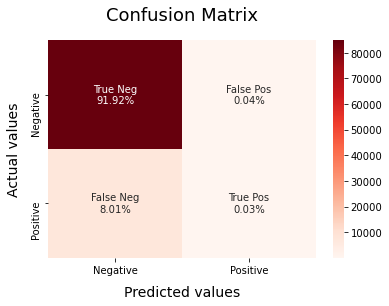

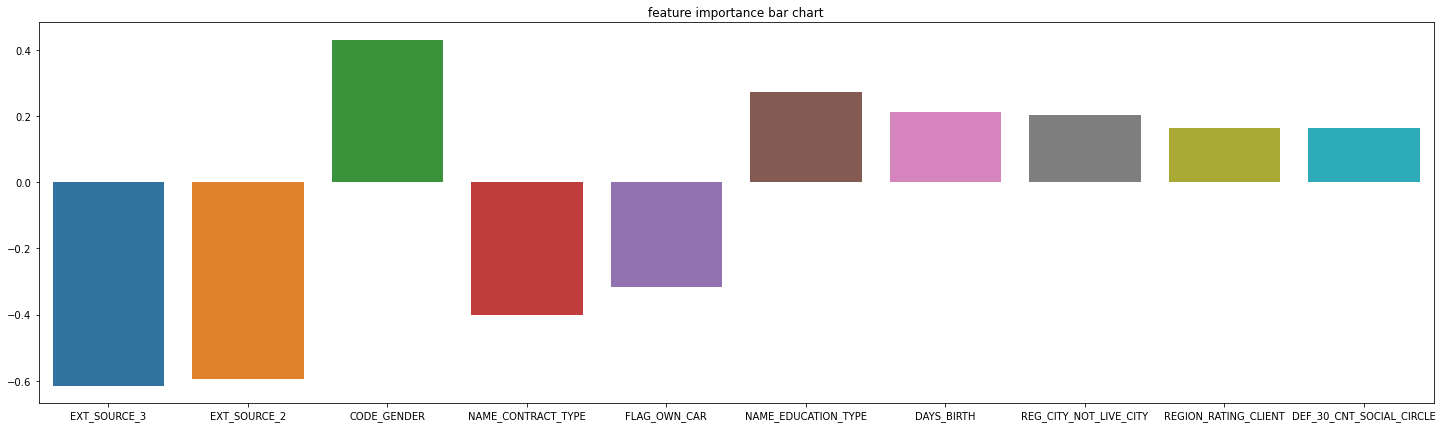

In [219]:
lg = LogisticRegression(solver='lbfgs', max_iter=100, verbose=0, warm_start=False, l1_ratio=None)
history=lg.fit(X_train_scaled, y_train)
lg_df = model_Evaluate(lg, X, y)

### xgboost

In [220]:
xgb_class = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 8, n_estimators = 20,  use_label_encoder=False)

Accuracy of model on training data : 92.1939820772379
Accuracy of model on testing data : 91.95482038719189 

[19:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.50      0.02      0.03      7421

    accuracy                           0.92     92254
   macro avg       0.71      0.51      0.50     9225

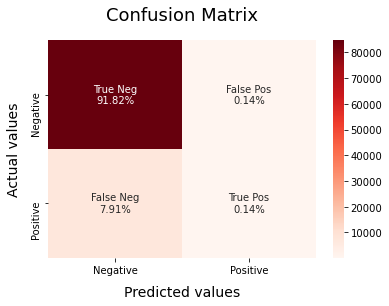

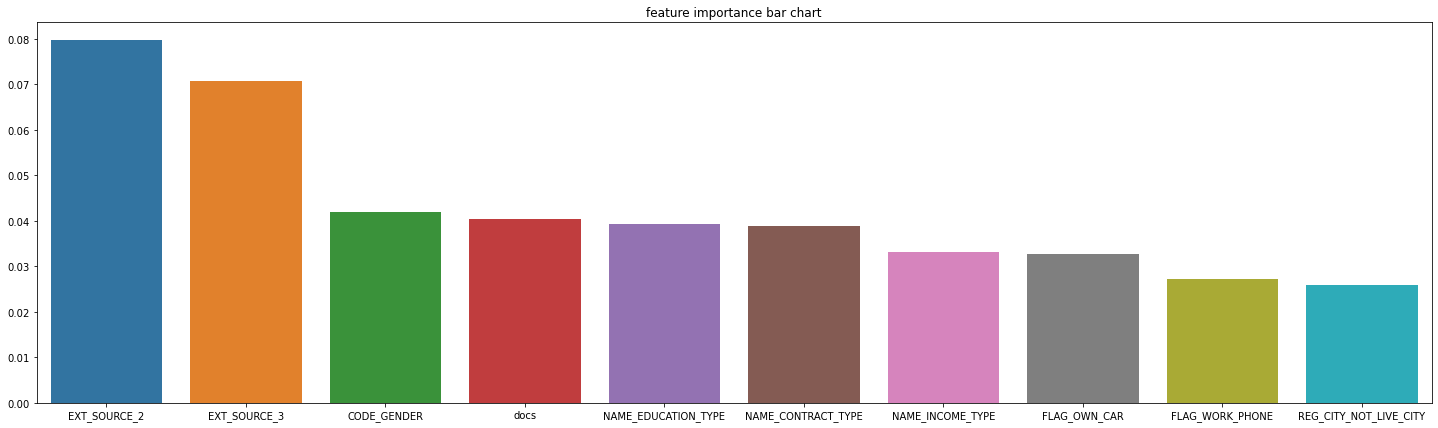

In [221]:
xgb_class.fit(X_train_scaled,y_train,
             eval_metric='logloss')
xgb_df = model_Evaluate(xgb_class, X, y)

### SVM

Accuracy of model on training data : 91.91059988757625
Accuracy of model on testing data : 91.94614867648015 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.40      0.00      0.00      7421

    accuracy                           0.92     92254
   macro avg       0.66      0.50      0.48     92254
weighted avg       0.88      0.92      0.88     92254

f2 score: 0.4927306594774508
matthews_corrcoef: 0.025003336638430934
CalibratedClassifierCV


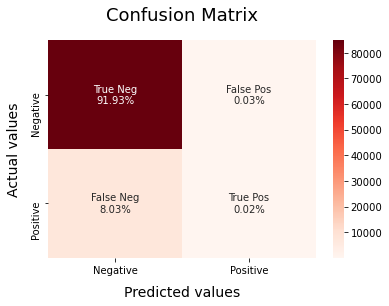

In [222]:
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_scaled, y_train)
svm_df = model_Evaluate(clf, X, y)

### NB

Accuracy of model on training data : 91.75497196374566
Accuracy of model on testing data : 91.77596635376244 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.23      0.01      0.02      7421

    accuracy                           0.92     92254
   macro avg       0.58      0.50      0.49     92254
weighted avg       0.86      0.92      0.88     92254

f2 score: 0.4963774326295156
matthews_corrcoef: 0.03241241877300102
BernoulliNB


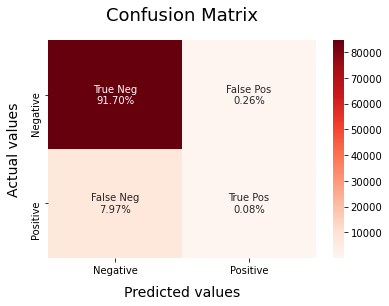

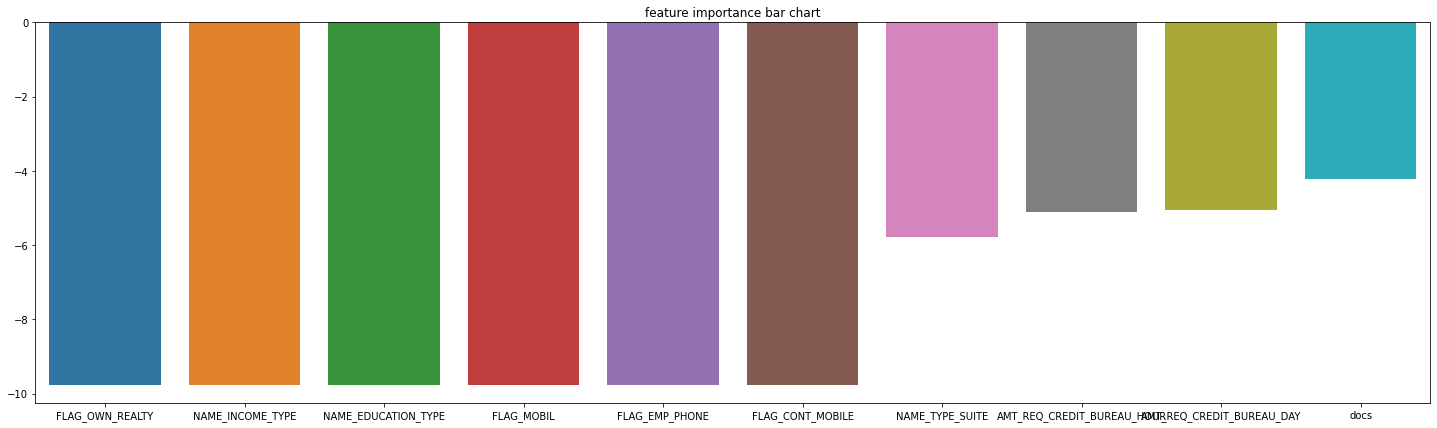

In [223]:
nb = BernoulliNB()
nb.fit(X_train_scaled, y_train)
nb_df = model_Evaluate(nb, X, y)

### Random forest

Accuracy of model on training data : 94.00158879850598
Accuracy of model on testing data : 91.95156849567499 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.47      0.00      0.01      7421

    accuracy                           0.92     92254
   macro avg       0.69      0.50      0.48     92254
weighted avg       0.88      0.92      0.88     92254

f2 score: 0.4935586114928872
matthews_corrcoef: 0.0355120961149067
RandomForestClassifier


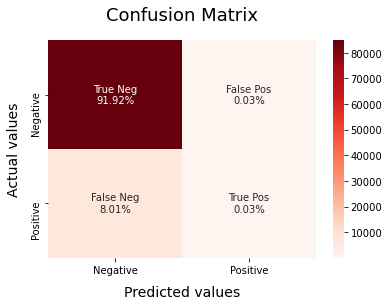

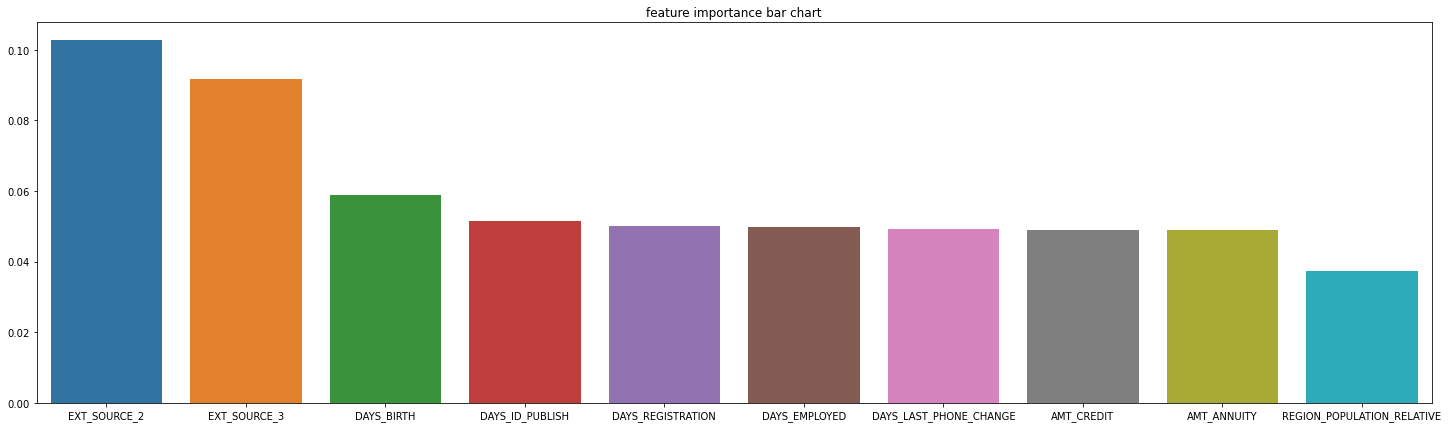

In [224]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=20)
rf.fit(X_train_scaled, y_train)
rf_df = model_Evaluate(rf, X, y)

since our data is imbalance, so we tried to change the parameters in model, to get better performance

In [226]:
all_model_results = [lg_df, xgb_df, svm_df, nb_df, rf_df]
all_model_string = ['lg_df', 'xgb_df', 'svm_df', 'nb_df', 'rf_df']

final_all_model_results = pd.concat(all_model_results)
final_all_model_results['name'] = all_model_string
final_all_model_results

,Train_Accuracy,Test_Accuracy,Precision,Recall,AUC,F1_Score,F2_Score,Roc_Auc_score,Matthews_corrcoef,name
0,0.919055,0.919516,0.468750,0.004043,0.725048,0.008016,0.493800,0.725048,0.037618,lg_df
0,0.921940,0.919548,0.498024,0.016979,0.739716,0.032838,0.501477,0.739716,0.080515,xgb_df
0,0.919106,0.919461,0.395349,0.002291,0.726351,0.004555,0.492731,0.726351,0.025003,svm_df
0,0.917550,0.917760,0.232258,0.009702,0.682149,0.018626,0.496377,0.682149,0.032412,nb_df
0,0.940016,0.919516,0.465517,0.003638,0.696869,0.007220,0.493559,0.696869,0.035512,rf_df


# Change the weight in models

Accuracy of model on training data : 67.38782014057615
Accuracy of model on testing data : 67.70654930951503 

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     84833
           1       0.15      0.65      0.24      7421

    accuracy                           0.68     92254
   macro avg       0.55      0.66      0.52     92254
weighted avg       0.89      0.68      0.75     92254

f2 score: 0.5558423786516835
matthews_corrcoef: 0.1876988157759991
LogisticRegression


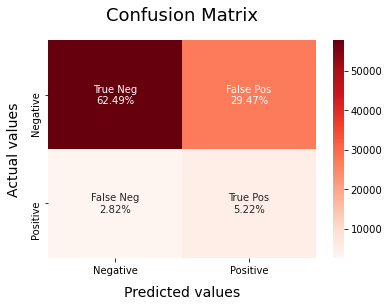

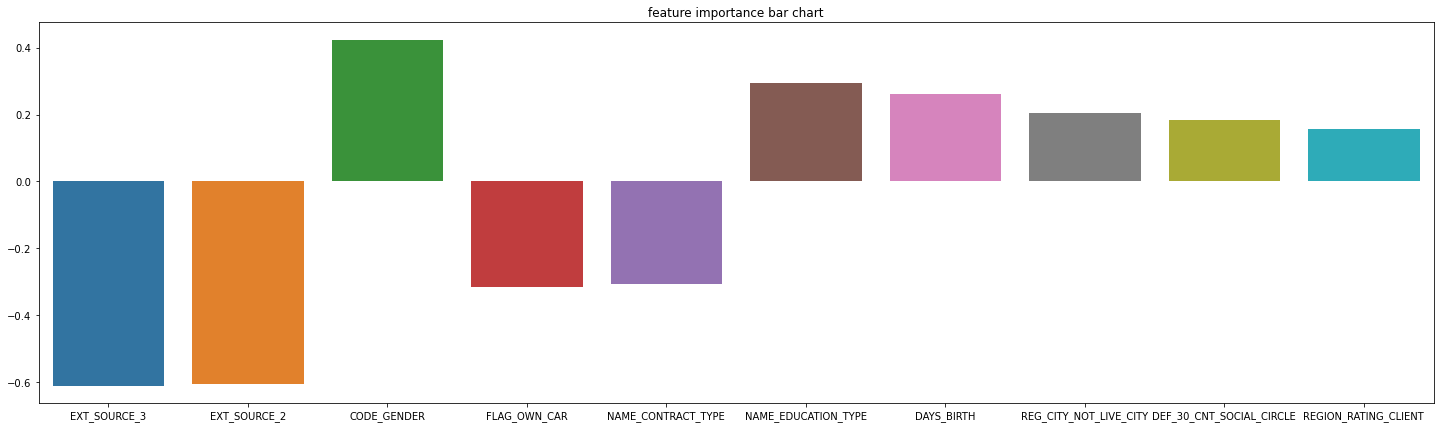

In [227]:
lg_weight = LogisticRegression(solver='lbfgs', max_iter=100, verbose=0, warm_start=False, l1_ratio=None, class_weight='balanced')
history_weight=lg_weight.fit(X_train_scaled, y_train)
lg_weight_df = model_Evaluate(lg_weight, X, y)

In [228]:
# scale_pos_weight = 12 due to majority class being 12x of minority class
xgb_class = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 8, n_estimators = 20, 
                             use_label_encoder=False, scale_pos_weight=12)

Accuracy of model on training data : 73.50330070566811
Accuracy of model on testing data : 70.86088408090706 

[19:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84833
           1       0.16      0.62      0.26      7421

    accuracy                           0.71     92254
   macro avg       0.56      0.67      0.54     922

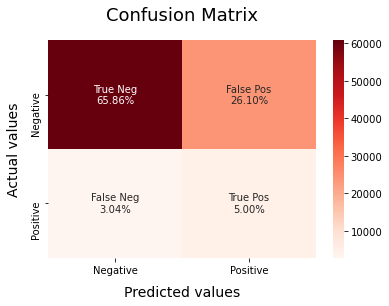

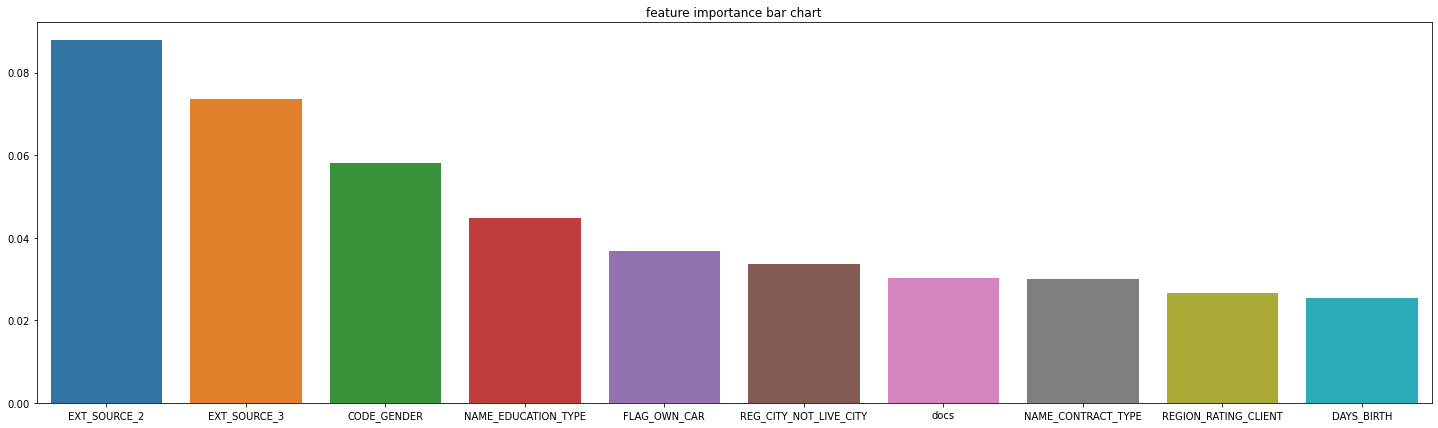

In [229]:
xgb_class.fit(X_train_scaled,y_train,
             eval_metric='logloss')
xgb_weight_df = model_Evaluate(xgb_class, X, y)

Accuracy of model on training data : 91.91478093627617
Accuracy of model on testing data : 91.95590435103085 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.00      0.00      0.00      7421

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

f2 score: 0.49140264049343585
matthews_corrcoef: 0.0
CalibratedClassifierCV


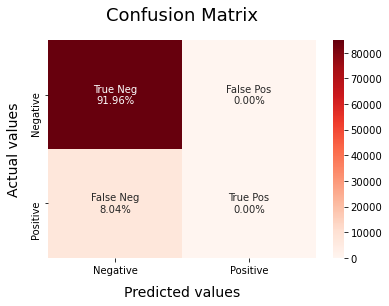

In [230]:
svm_weight = LinearSVC(class_weight='balanced')
clf_weight = CalibratedClassifierCV(svm_weight) 
clf_weight.fit(X_train_scaled, y_train)
# svm1.fit(X_train_scaled, y_train)
svm_weight_df = model_Evaluate(clf_weight, X, y)

Accuracy of model on training data : 91.75497196374566
Accuracy of model on testing data : 91.77596635376244 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.23      0.01      0.02      7421

    accuracy                           0.92     92254
   macro avg       0.58      0.50      0.49     92254
weighted avg       0.86      0.92      0.88     92254

f2 score: 0.4963774326295156
matthews_corrcoef: 0.03241241877300102
BernoulliNB


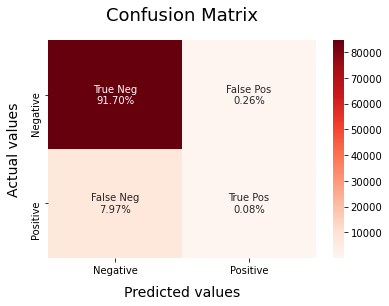

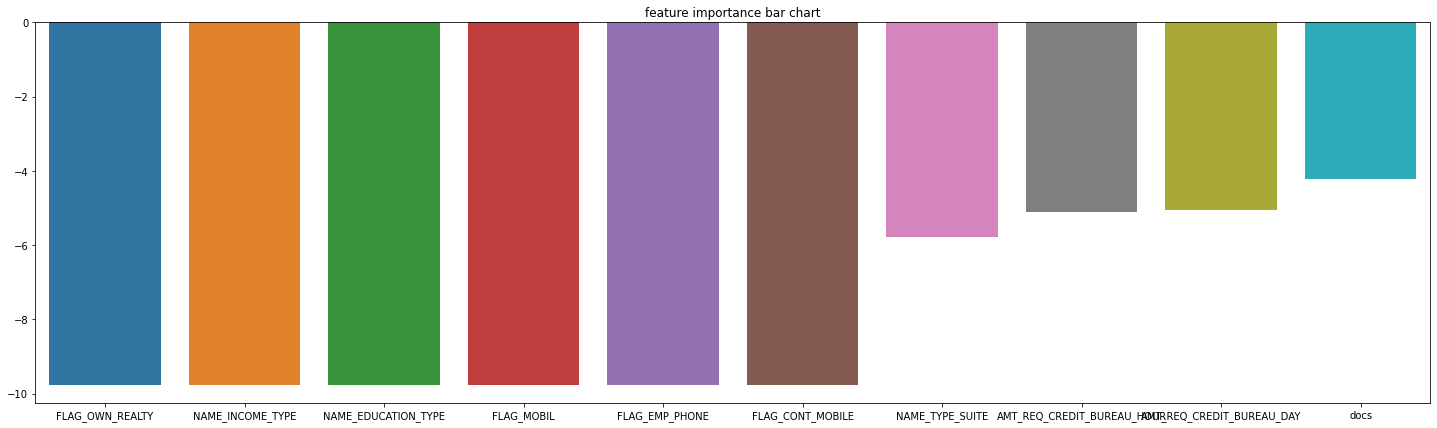

In [231]:
nb_weight = BernoulliNB()
nb_weight.fit(X_train_scaled, y_train)
nb_weight_df = model_Evaluate(nb,X,y)

Accuracy of model on training data : 95.7302201554421
Accuracy of model on testing data : 88.61837969085352 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     84833
           1       0.24      0.19      0.21      7421

    accuracy                           0.89     92254
   macro avg       0.59      0.57      0.58     92254
weighted avg       0.88      0.89      0.88     92254

f2 score: 0.5717669582408743
matthews_corrcoef: 0.1539694669113156
RandomForestClassifier


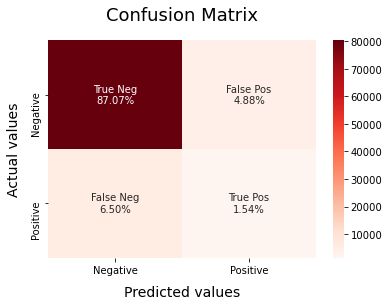

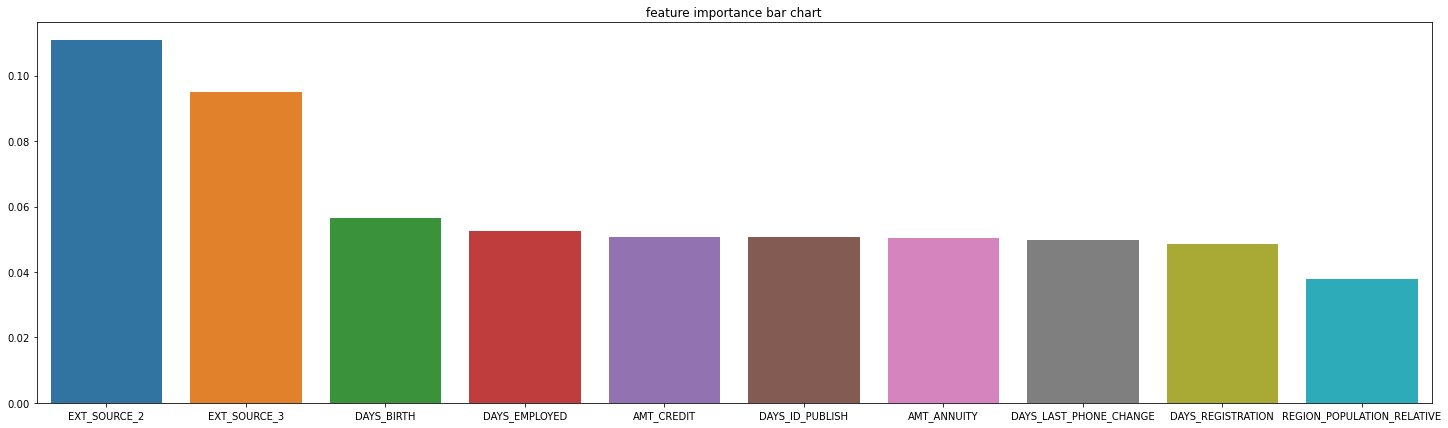

In [232]:
rf_weight = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=20, class_weight='balanced')
rf_weight.fit(X_train_scaled, y_train)
rf_weight_df = model_Evaluate(rf_weight, X, y)

In [233]:
all_model_results = [lg_weight_df, xgb_weight_df, svm_weight_df, nb_weight_df, rf_weight_df]
all_model_string = ['lg_weight_df', 'xgb_weight_df', 'svm_weight_df', 'nb_weight_df', 'rf_weight_df']

final_all_model_results = pd.concat(all_model_results)
final_all_model_results['name'] = all_model_string
final_all_model_results

,Train_Accuracy,Test_Accuracy,Precision,Recall,AUC,F1_Score,F2_Score,Roc_Auc_score,Matthews_corrcoef,name
0,0.673878,0.677065,0.150486,0.648969,0.724987,0.244318,0.555842,0.724987,0.187699,lg_weight_df
0,0.735033,0.708609,0.160899,0.622153,0.729416,0.255676,0.574711,0.729416,0.198772,xgb_weight_df
0,0.919148,0.919559,0.000000,0.000000,0.705948,0.000000,0.491403,0.705948,0.000000,svm_weight_df
0,0.917550,0.917760,0.232258,0.009702,0.682149,0.018626,0.496377,0.682149,0.032412,nb_weight_df
0,0.957302,0.886184,0.240256,0.191888,0.697051,0.213365,0.571767,0.697051,0.153969,rf_weight_df


# Over sampling with weight change in model

In [234]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE

In [235]:
sm = BorderlineSMOTE(random_state=2022)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

In [236]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_sm)
X_test_scaled = scaler.transform(X_test)

In [241]:
def model_Evaluate_sm(model):
    # accuracy of model on training data
    acc_train = model.score(X_train_scaled, y_sm)
    # accuracy of model on test data
    acc_test = model.score(X_test_scaled, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
    
    # y_score
    try:
        y_score = model.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
    except:
        pass
    
    try:
        clf = model.fit(X_train_scaled, y_train)
        y_score = clf.predict_proba(X_test_scaled)
    except:
        pass
    
    # precision of model on test data
    pre_test = precision_score(y_test, y_pred)
    
    # recall of model on test data
    rec_test = recall_score(y_test, y_pred)
    
    # f1 of model on test data
    f1_test = f1_score(y_test, y_pred)
    
    # f2 of model on test data
    f2_test = fbeta_score(y_test, y_pred, beta=2, average='macro')
    
    # AUC of model on test data
    auc_test = roc_auc_score(y_test, y_pred_proba)
    
    # Mattews_corrcoef
    mcc = matthews_corrcoef(y_pred, y_test)
    
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(f'f2 score: {f2_test}')
    print(f'matthews_corrcoef: {mcc}')
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    d = {'Train_Accuracy': [acc_train], 'Test_Accuracy': [acc_test], 
         'Precision': [pre_test], 'Recall': [rec_test],
         'AUC': [auc_test], 'F1_Score': [f1_test], 'F2_Score': [f2_test], 
         'Roc_Auc_score': auc_test, 'Matthews_corrcoef' : mcc}
    
    df = pd.DataFrame(data=d)
    # summarize feature importance
    print(type(model).__name__)
    modelName = type(model).__name__
    if (modelName not in exclude_model):
        if(modelName in featureimportance) :
            impt = zip(X_train.columns, model.feature_importances_)
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        else:
            impt = zip(X_train.columns, model.coef_[0])
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        for feat, importance in sorted(impt, key = lambda x:abs(x[1]), reverse = True)[:10]:
                print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
        fig = plt.figure(figsize =(25, 7))
        sns.barplot([item[0] for item in sorted_impt[:10]], [item[1] for item in sorted_impt[:10]], capsize = 2)
        plt.title('feature importance bar chart')
        plt.show()

    # roc curve
    try:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
        plt.figure()
        lw = 2
        plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    except:
        pass
    return df

Accuracy of model on training data : 79.76881826406473
Accuracy of model on testing data : 75.74847703080624 

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     84833
           1       0.13      0.37      0.20      7421

    accuracy                           0.76     92254
   macro avg       0.53      0.58      0.53     92254
weighted avg       0.87      0.76      0.80     92254

f2 score: 0.544809149222814
matthews_corrcoef: 0.10500641191606655
LogisticRegression


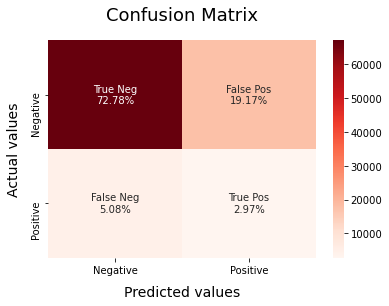

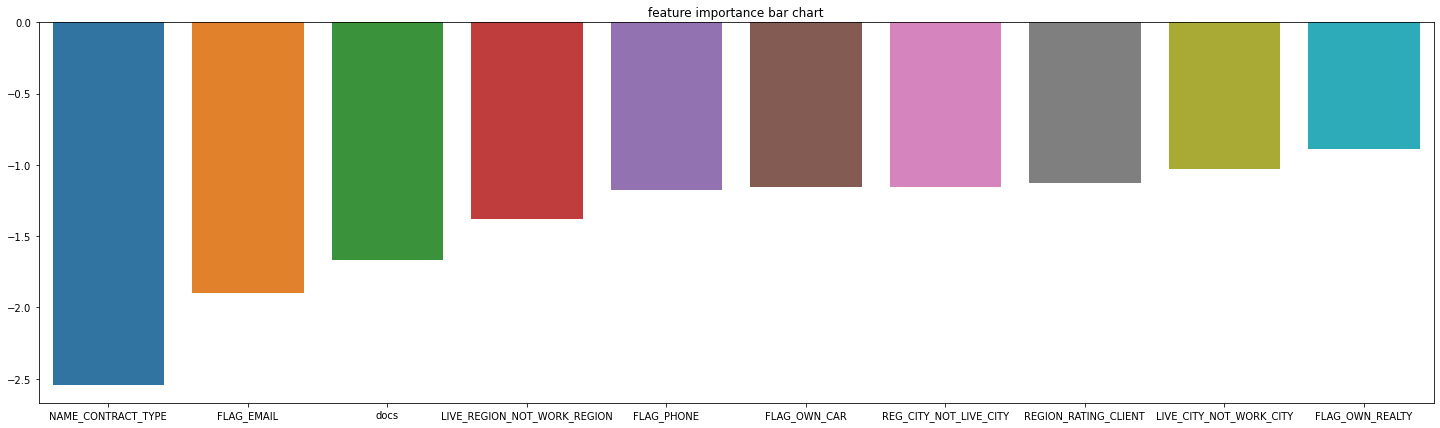

In [242]:
lg_sm = LogisticRegression(solver='lbfgs', max_iter=100, verbose=0, warm_start=False, l1_ratio=None, class_weight='balanced')
history_sm=lg_sm.fit(X_train_scaled, y_sm)
lg_sm_df = model_Evaluate_sm(lg_sm)

In [243]:
# scale_pos_weight = 12 due to majority class being 12x of minority class
xgb_class_sm = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 8, n_estimators = 20, 
                             use_label_encoder=False, scale_pos_weight=12)

Accuracy of model on training data : 77.0652959520452
Accuracy of model on testing data : 55.949877512086196 

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     84833
           1       0.12      0.73      0.21      7421

    accuracy                           0.56     92254
   macro avg       0.54      0.64      0.45     92254
weighted avg       0.89      0.56      0.66     92254

f2 score: 0.481215085334593
matthews_corrcoef: 0.1481557797797414
XGBClassifier


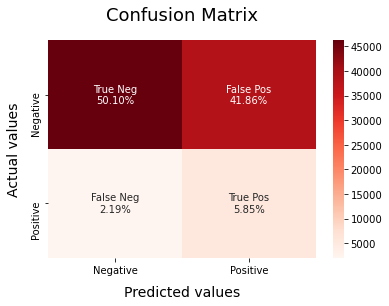

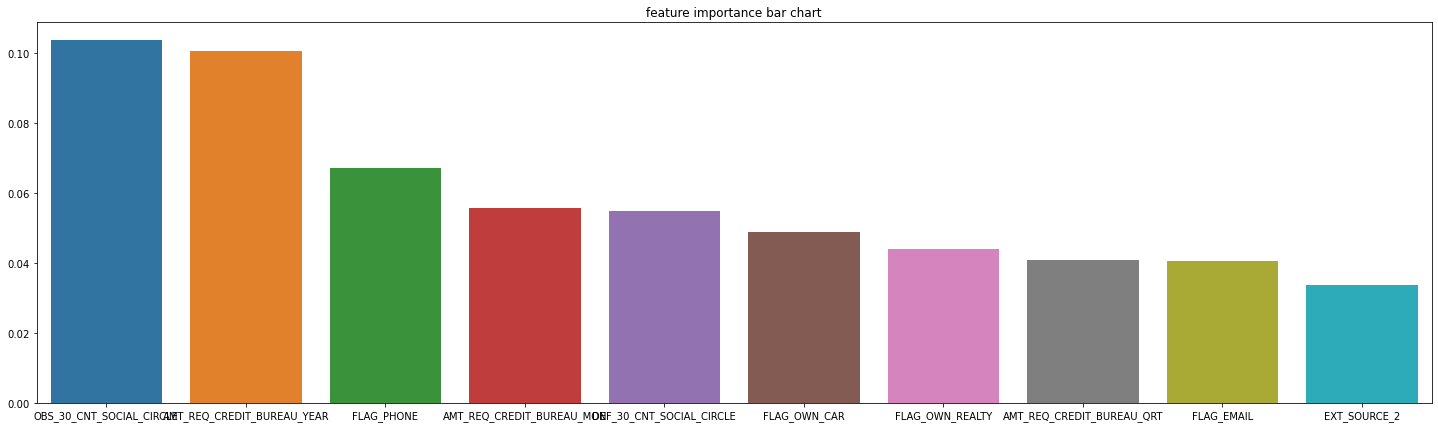

In [244]:
xgb_class_sm.fit(X_train_scaled,y_sm,
             eval_metric='logloss')
xgb_sm_df = model_Evaluate_sm(xgb_class_sm)

Accuracy of model on training data : 79.06349663639166
Accuracy of model on testing data : 76.22867301146835 

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     84833
           1       0.14      0.38      0.20      7421

    accuracy                           0.76     92254
   macro avg       0.54      0.59      0.53     92254
weighted avg       0.87      0.76      0.81     92254

f2 score: 0.550471339670298
matthews_corrcoef: 0.11344879906896527
CalibratedClassifierCV


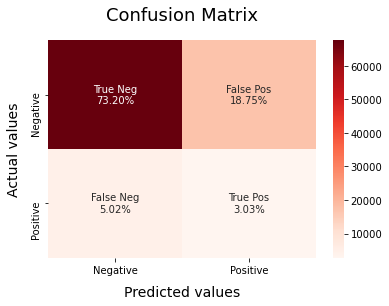

In [245]:
svm_sm = LinearSVC(class_weight='balanced')
clf_sm = CalibratedClassifierCV(svm_sm) 
clf_sm.fit(X_train_scaled, y_sm)
# svm1.fit(X_train_scaled, y_train)
svm_sm_df = model_Evaluate_sm(clf_sm)

Accuracy of model on training data : 79.04201604221316
Accuracy of model on testing data : 74.84878704446419 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85     84833
           1       0.12      0.32      0.17      7421

    accuracy                           0.75     92254
   macro avg       0.52      0.55      0.51     92254
weighted avg       0.86      0.75      0.80     92254

f2 score: 0.525025932846503
matthews_corrcoef: 0.07172588187198492
BernoulliNB


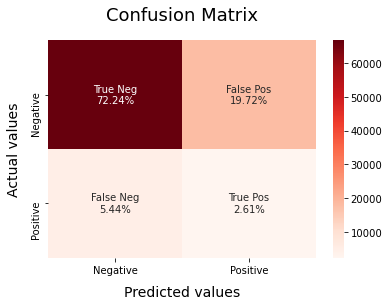

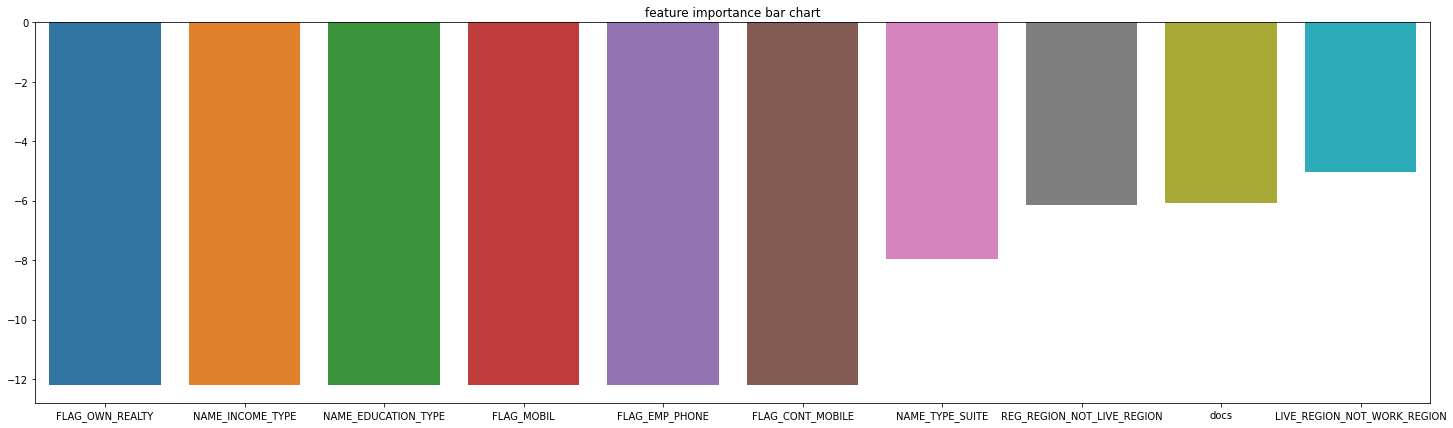

In [246]:
nb_sm = BernoulliNB()
nb_sm.fit(X_train_scaled, y_sm)
nb_sm_df = model_Evaluate_sm(nb_sm)

Accuracy of model on training data : 97.12968719200619
Accuracy of model on testing data : 88.51540312615171 

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     84833
           1       0.15      0.10      0.12      7421

    accuracy                           0.89     92254
   macro avg       0.54      0.53      0.53     92254
weighted avg       0.86      0.89      0.87     92254

f2 score: 0.5257979177216828
matthews_corrcoef: 0.06251923169893457
RandomForestClassifier


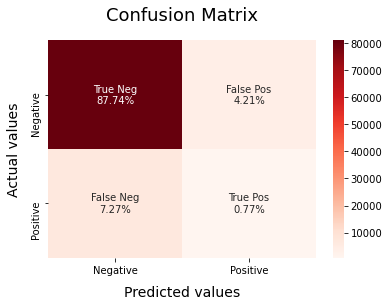

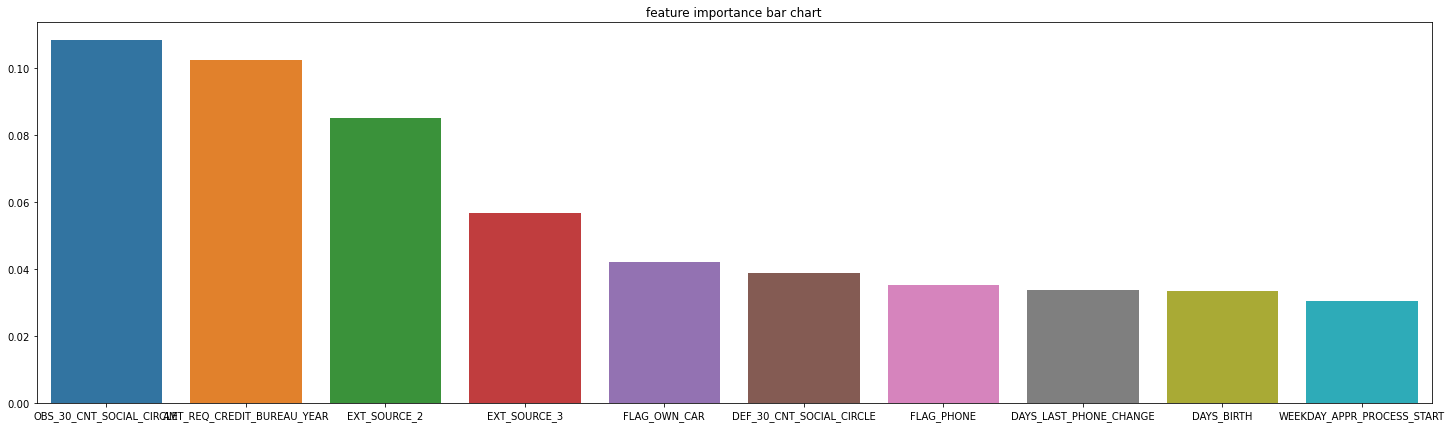

In [247]:
rf_sm = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=20, class_weight='balanced')
rf_sm.fit(X_train_scaled, y_sm)
rf_sm_df = model_Evaluate_sm(rf_sm)

In [248]:
all_model_results = [lg_sm_df, xgb_sm_df, svm_sm_df, nb_sm_df, rf_sm_df]
all_model_string = ['lg_sm_df', 'xgb_sm_df', 'svm_sm_df', 'nb_sm_df', 'rf_sm_df']

final_all_model_results = pd.concat(all_model_results)
final_all_model_results['name'] = all_model_string
final_all_model_results

,Train_Accuracy,Test_Accuracy,Precision,Recall,AUC,F1_Score,F2_Score,Roc_Auc_score,Matthews_corrcoef,name
0,0.797688,0.757485,0.133996,0.368818,0.619747,0.196574,0.544809,0.619747,0.105006,lg_sm_df
0,0.770653,0.559499,0.122628,0.727260,0.690515,0.209869,0.481215,0.690515,0.148156,xgb_sm_df
0,0.790635,0.762287,0.138918,0.376095,0.628840,0.202893,0.550471,0.628840,0.113449,svm_sm_df
0,0.790420,0.748488,0.116830,0.324215,0.589666,0.171765,0.525026,0.589666,0.071726,nb_sm_df
0,0.971297,0.885154,0.154700,0.095809,0.646864,0.118332,0.525798,0.646864,0.062519,rf_sm_df


# Under sampling with weight change in model---random under sampler

In [251]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X, y)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size= 0.3, random_state = 2020)

In [253]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy of model on training data : 53.362259996190595
Accuracy of model on testing data : 53.74509506362868 

              precision    recall  f1-score   support

           0       0.97      0.52      0.67     84833
           1       0.12      0.79      0.22      7421

    accuracy                           0.54     92254
   macro avg       0.54      0.65      0.44     92254
weighted avg       0.90      0.54      0.64     92254

f2 score: 0.4751058174987052
matthews_corrcoef: 0.16535085297660312
LogisticRegression


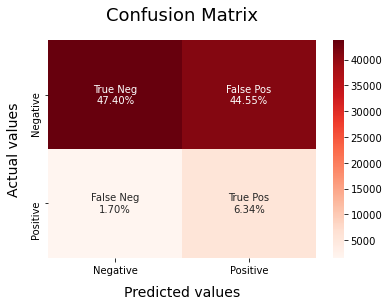

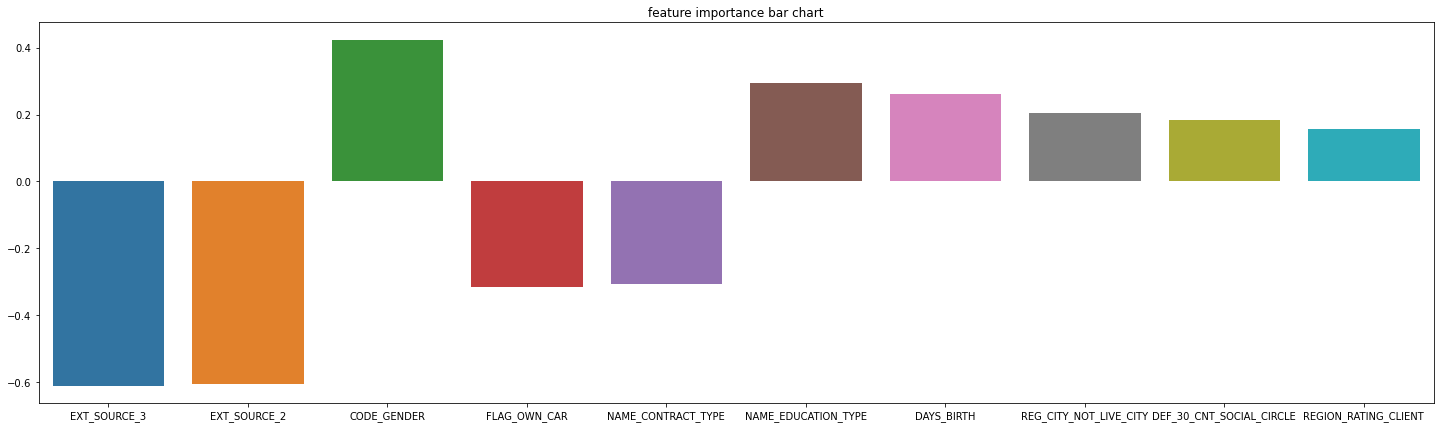

In [254]:
lg_rus = LogisticRegression(solver='lbfgs', max_iter=100, verbose=0, warm_start=False, l1_ratio=None, class_weight='balanced')
history_rus=lg_weight.fit(X_train_scaled, y_train)
lg_rus_df = model_Evaluate(lg_weight, X, y)

In [257]:
# scale_pos_weight = 12 due to majority class being 12x of minority class
xgb_class_rus = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 8, n_estimators = 20, 
                             use_label_encoder=False, scale_pos_weight=12)

Accuracy of model on training data : 58.18443389440369
Accuracy of model on testing data : 53.52802954011413 

[20:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.77      0.10      0.18      7438
           1       0.52      0.97      0.68      7457

    accuracy                           0.54     14895
   macro avg       0.64      0.53      0.43     148

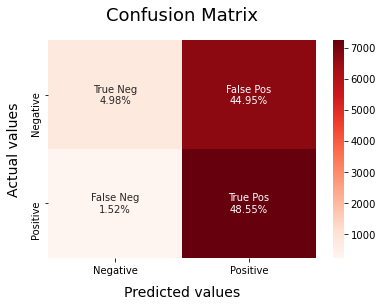

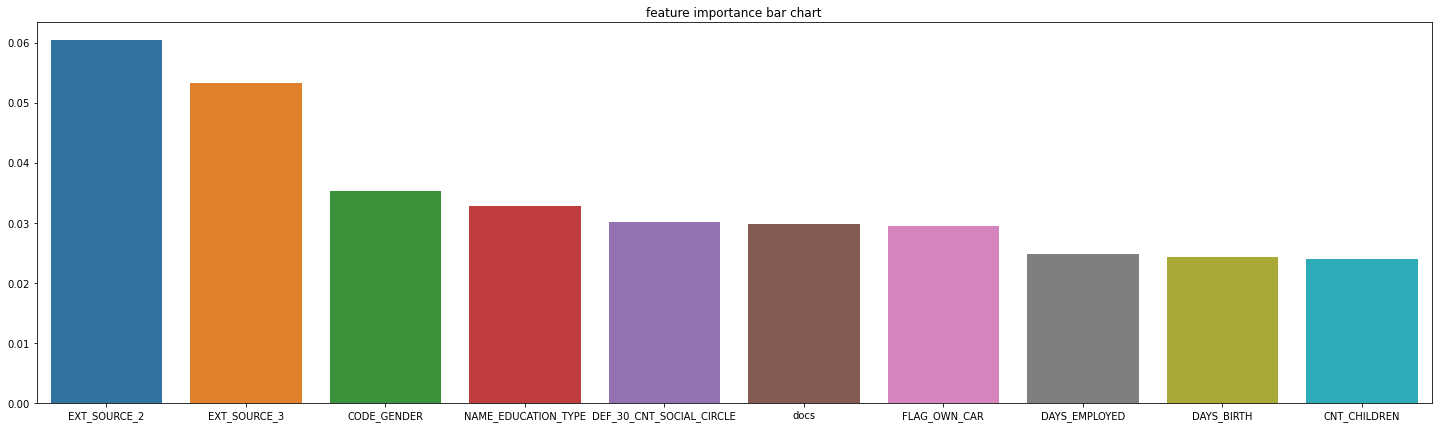

In [261]:
xgb_rus = xgb_class_rus.fit(X_train_scaled,y_train,
             eval_metric='logloss')
xgb_rus_df = model_Evaluate(xgb_rus, X_rus, y_rus)

Accuracy of model on training data : 66.6062437059416
Accuracy of model on testing data : 66.97549513259483 

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      7438
           1       0.67      0.66      0.67      7457

    accuracy                           0.67     14895
   macro avg       0.67      0.67      0.67     14895
weighted avg       0.67      0.67      0.67     14895

f2 score: 0.6697177683080127
matthews_corrcoef: 0.3396499529839841
CalibratedClassifierCV


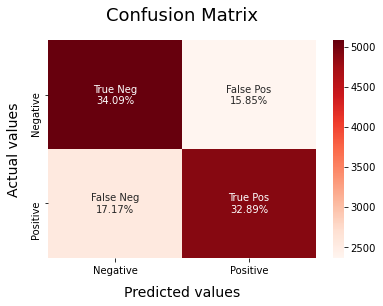

In [266]:
svm_rus = LinearSVC(class_weight='balanced')
clf_rus = CalibratedClassifierCV(svm_weight) 
clf_rus.fit(X_train_scaled, y_train)
# svm1.fit(X_train_scaled, y_train)
svm_rus_df = model_Evaluate(clf_rus, X_rus, y_rus)

Accuracy of model on training data : 63.89296504100129
Accuracy of model on testing data : 63.49110439744881 

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      7438
           1       0.64      0.63      0.63      7457

    accuracy                           0.63     14895
   macro avg       0.63      0.63      0.63     14895
weighted avg       0.63      0.63      0.63     14895

f2 score: 0.6349073765293225
matthews_corrcoef: 0.26984856954589553
BernoulliNB


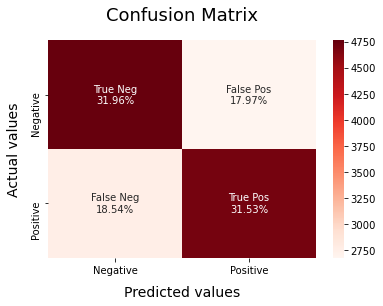

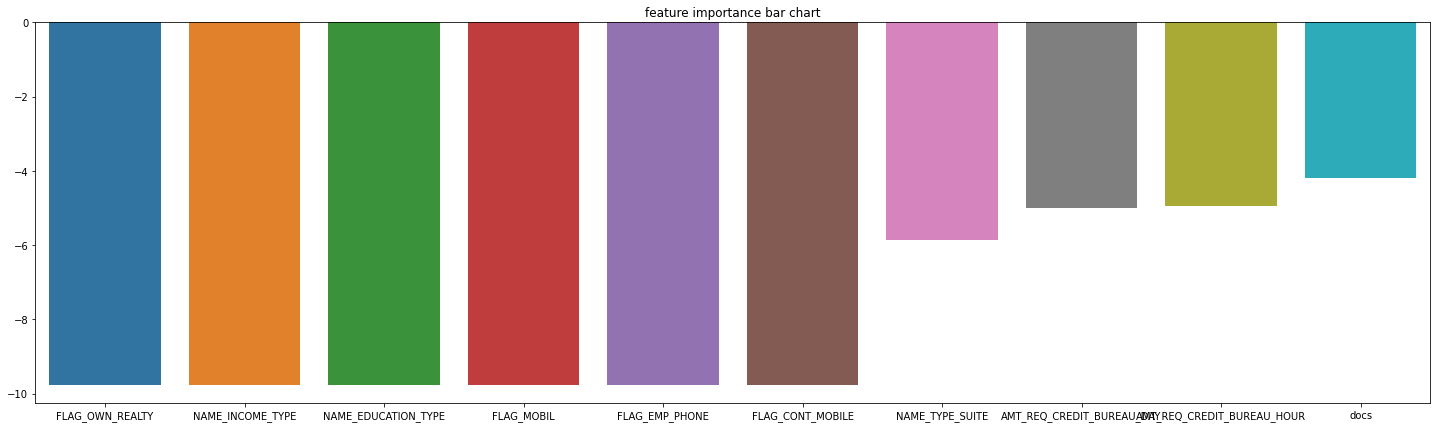

In [267]:
nb_rus = BernoulliNB()
nb_rus.fit(X_train_scaled, y_train)
nb_rus_df = model_Evaluate(nb_rus,X_rus,y_rus)

Accuracy of model on training data : 97.32124874118831
Accuracy of model on testing data : 65.20980194696206 

              precision    recall  f1-score   support

           0       0.65      0.66      0.65      7438
           1       0.66      0.64      0.65      7457

    accuracy                           0.65     14895
   macro avg       0.65      0.65      0.65     14895
weighted avg       0.65      0.65      0.65     14895

f2 score: 0.6520847098774969
matthews_corrcoef: 0.30425675378444833
RandomForestClassifier


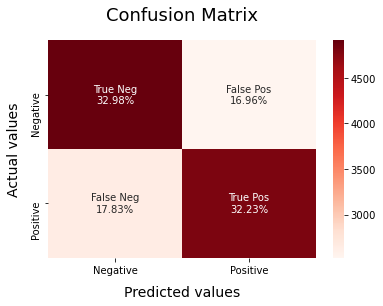

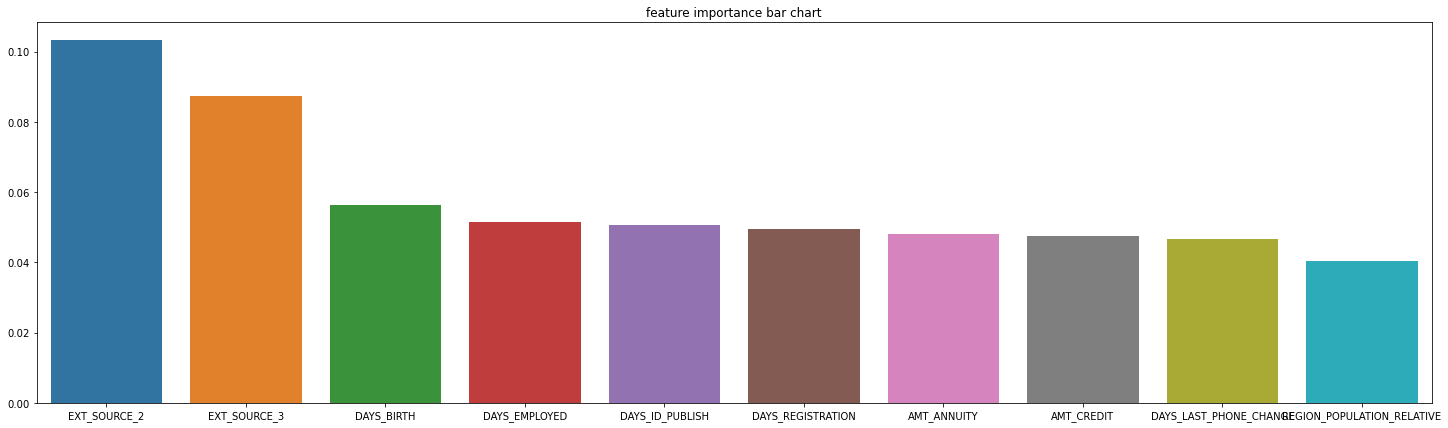

In [268]:
rf_rus = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=20, class_weight='balanced')
rf_rus.fit(X_train_scaled, y_train)
rf_rus_df = model_Evaluate(rf_rus, X_rus, y_rus)

In [269]:
all_model_results = [lg_rus_df, xgb_rus_df, svm_rus_df, nb_rus_df, rf_rus_df]
all_model_string = ['lg_rus_df', 'xgb_rus_df', 'svm_rus_df', 'nb_rus_df', 'rf_rus_df']

final_all_model_results = pd.concat(all_model_results)
final_all_model_results['name'] = all_model_string
final_all_model_results

,Train_Accuracy,Test_Accuracy,Precision,Recall,AUC,F1_Score,F2_Score,Roc_Auc_score,Matthews_corrcoef,name
0,0.533623,0.537451,0.124614,0.788438,0.723392,0.215213,0.475106,0.723392,0.165351,lg_rus_df
0,0.581844,0.535280,0.519207,0.969693,0.709253,0.676300,0.473537,0.709253,0.140871,xgb_rus_df
0,0.666062,0.669755,0.674793,0.656967,0.723856,0.665761,0.669718,0.723856,0.339650,svm_rus_df
0,0.638930,0.634911,0.636918,0.629744,0.682553,0.633311,0.634907,0.682553,0.269849,nb_rus_df
0,0.973212,0.652098,0.655248,0.643825,0.707438,0.649486,0.652085,0.707438,0.304257,rf_rus_df


# Ensemble learning with the best imbalance learning method and weight change in model

In [270]:
from sklearn.ensemble import StackingClassifier

Since the under sample will frop too many info, so we decide to use oversample to do the ensemble learning

In [312]:
X = df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)

In [329]:
sm = BorderlineSMOTE(random_state=2022)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

In [331]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_sm)
X_test_scaled = scaler.transform(X_test)

[22:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

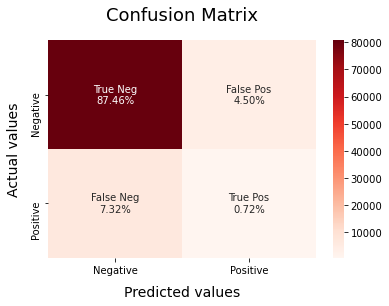

In [316]:
estimators = [
    ('lg', lg_sm),
    ('xgb', xgb_class_sm),
    ('rf', rf_sm),
    ('nb', nb_sm),
    ('svm', svm_sm),
]
stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced'))

model_over = stacked_clf.fit(X_train_scaled,y_sm)
stacked_clf_df_over = model_Evaluate_sm(model_over)

In [332]:
model_over = stacked_clf.fit(X_train_scaled,y_sm)
model_over.final_estimator_.coef_

[23:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([[ 0.75384112, -2.72213378, 12.23436698, -0.72715287, -0.45302929]])

In [318]:
model_over.estimators_[1].feature_importances_

array([0.01610348, 0.00786416, 0.04879278, 0.04397359, 0.02748152,
       0.02265173, 0.026355  , 0.01745997, 0.00677775, 0.01669622,
       0.02332159, 0.01947065, 0.01068464, 0.01427107, 0.01090257,
       0.00859696, 0.        , 0.        , 0.01192204, 0.00170538,
       0.06723674, 0.0406054 , 0.02631852, 0.00777623, 0.00164371,
       0.00458539, 0.0028281 , 0.02143808, 0.01540145, 0.00416916,
       0.00720964, 0.00644248, 0.00900737, 0.00479574, 0.03379934,
       0.02191995, 0.10358496, 0.05489463, 0.01556043, 0.        ,
       0.        , 0.00500936, 0.05580674, 0.04095913, 0.10062571,
       0.00613662, 0.00721395], dtype=float32)

under sample ensemble

In [319]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 2022)
X_rus, y_rus = rus.fit_resample(X, y)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size= 0.3, random_state = 2022)

In [321]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

[23:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

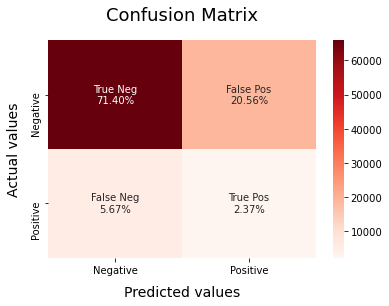

In [322]:
estimators_under = [
    ('lg', lg_rus),
    ('xgb', xgb_class_rus),
    ('rf', rf_rus),
    ('nb', nb_rus),
    ('svm', svm_rus),
]
stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced'))

model_under = stacked_clf.fit(X_train, y_train)
stacked_clf_df_under = model_Evaluate(model_under, X, y)

In [326]:
ensemble_under.final_estimator_.coef_

array([[ 2.21808847,  2.09635199,  0.71951951, -0.24895038,  0.01540766]])

In [325]:
ensemble_results = [stacked_clf_df_over, stacked_clf_df_under]
ensemble_string = ['ensemble_over', 'ensemble_under']

final_ensemble_results = pd.concat(ensemble_results)
final_ensemble_results['name'] = ensemble_string
final_ensemble_results

,Train_Accuracy,Test_Accuracy,Precision,Recall,AUC,F1_Score,F2_Score,Roc_Auc_score,Matthews_corrcoef,name
0,0.97507,0.881805,0.138167,0.089611,0.579118,0.108713,0.520838,0.579118,0.049796,ensemble_over
0,0.73816,0.737735,0.103489,0.294974,0.595922,0.153222,0.508872,0.595922,0.046221,ensemble_under
